# **INPUT**


In [11]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pycountry
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")
from scipy.stats import pearsonr

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [12]:
# import numpy as np
import pandas as pd
import os
import scipy
import matplotlib
import seaborn as sns
import statsmodels as stats

from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency

from statsmodels.stats import rates
from statsmodels.stats.rates import test_poisson

from statsmodels.stats.rates import test_poisson_2indep
from scipy.stats import ttest_ind
from statsmodels.stats import proportion as ssp
from statsmodels.stats.proportion import proportions_ztest
from matplotlib import pyplot as plt
from collections import Counter
from scipy import stats
from scipy.stats import skew,kurtosis
from numpy import random
from numpy.linalg import inv
from numpy import random
from scipy.stats import expon
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t,f
from statsmodels.stats import weightstats as ssw
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [13]:
os.chdir(r'C:\Users\hp\OneDrive\Desktop\exam')

In [14]:
df = pd.read_csv('hotel_bookings.csv')

# EDA

In [15]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [16]:
df.tail(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


## Sneak peak

In [17]:
df.shape

(119390, 32)

In [18]:
# we have 119390 rows and 32 columns

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [20]:
df.describe().round(2)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119386.0,119390.00,119390.00,119390.00,119390.00,119390.00,103050.00,6797.00,119390.00,119390.00,119390.00,119390.00
mean,0.37,104.01,2016.16,27.17,15.80,0.93,2.50,1.86,0.1,0.01,0.03,0.09,0.14,0.22,86.69,189.27,2.32,101.83,0.06,0.57
std,0.48,106.86,0.71,13.61,8.78,1.00,1.91,0.58,0.4,0.10,0.18,0.84,1.50,0.65,110.77,131.66,17.59,50.54,0.25,0.79
min,0.00,0.00,2015.00,1.00,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,1.00,6.00,0.00,-6.38,0.00,0.00
25%,0.00,18.00,2016.00,16.00,8.00,0.00,1.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,9.00,62.00,0.00,69.29,0.00,0.00
50%,0.00,69.00,2016.00,28.00,16.00,1.00,2.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,14.00,179.00,0.00,94.58,0.00,0.00
75%,1.00,160.00,2017.00,38.00,23.00,2.00,3.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,229.00,270.00,0.00,126.00,0.00,1.00
max,1.00,737.00,2017.00,53.00,31.00,19.00,50.00,55.00,10.0,10.00,1.00,26.00,72.00,21.00,535.00,543.00,391.00,5400.00,8.00,5.00


In [21]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [22]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [23]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Missing values

In [24]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [25]:
df.isnull().mean() * 100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

### children missing values

In [26]:
np.unique(df.children,return_counts=True)

(array([ 0.,  1.,  2.,  3., 10., nan]),
 array([110796,   4861,   3652,     76,      1,      4], dtype=int64))

In [27]:
df[df['children'] == 10.0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,10.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,2,No Deposit,8.0,NaN,0,Contract,133.16,0,1,No-Show,2015-07-12


In [28]:
df[df['children'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [29]:
df['children'].mode()

0    0.0
Name: children, dtype: float64

In [30]:
df['children'] = df['children'].fillna(0)

In [31]:
df[df['children'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


### Country missing values

In [32]:
x = df[df['country'].map(type) == float].index
x

Index([    30,   4127,   7092,   7860,   8779,   9376,   9610,   9612,  11262,
        11263,
       ...
        60651,  61244,  61245,  61249,  65907,  65908,  65909,  65910,  80830,
       101488],
      dtype='int64', length=488)

In [33]:
df['country'].mode()

0    PRT
Name: country, dtype: object

In [34]:
df['country'] = df['country'].fillna('PRT')

In [35]:
np.unique(df.country,return_counts=True)

(array(['ABW', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM',
        'ATA', 'ATF', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA',
        'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB',
        'BWA', 'CAF', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'CN', 'COL',
        'COM', 'CPV', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI',
        'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH',
        'FIN', 'FJI', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA',
        'GIB', 'GLP', 'GNB', 'GRC', 'GTM', 'GUY', 'HKG', 'HND', 'HRV',
        'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR',
        'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KHM', 'KIR',
        'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBY', 'LCA', 'LIE', 'LKA',
        'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDG', 'MDV', 'MEX',
        'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MOZ', 'MRT', 'MUS', 'MWI',
        'MYS', 'MYT', 'NAM', 'NCL', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL',
       

In [36]:
def convert_country(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        return 'Unknown'

# Apply to your DataFrame
df['country_name'] = df['country'].apply(convert_country)

In [37]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### company null values

In [38]:
# since company column has 94.30 % missing values we are dropping this column

In [39]:
df.drop('company', axis=1, inplace=True)

### agent null values

In [40]:
np.unique(df.agent,return_counts=True)

(array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  19.,  20.,  21.,  22.,  23.,
         24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
         35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  44.,  45.,  47.,
         50.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,
         63.,  64.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,
         75.,  77.,  78.,  79.,  81.,  82.,  83.,  85.,  86.,  87.,  88.,
         89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  98.,  99., 103.,
        104., 105., 106., 107., 110., 111., 112., 114., 115., 117., 118.,
        119., 121., 122., 126., 127., 128., 129., 132., 133., 134., 135.,
        138., 139., 141., 142., 143., 144., 146., 147., 148., 149., 150.,
        151., 152., 153., 154., 155., 156., 157., 158., 159., 162., 163.,
        165., 167., 168., 170., 171., 173., 174., 175., 177., 179., 180.,
        181., 182., 183., 184., 185., 

In [41]:
df['via_agent'] = df['agent'].notnull().astype(int)

In [42]:
np.unique(df.via_agent,return_counts=True)

(array([0, 1]), array([ 16340, 103050], dtype=int64))

In [43]:
df['agent'] = df['agent'].fillna('No_Agent')

In [44]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

### Date time column

In [45]:
#Combine the year, month, and day columns into a single datetime column of the arrival
# This helps in better filtering and reducing the number of columns
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +               
    df['arrival_date_month'].astype(str) + '-' +             
    df['arrival_date_day_of_month'].astype(str),              
    format='%Y-%B-%d',                                     
    errors='coerce'                                           
)



In [46]:
df['arrival_day_name'] = df['arrival_date'].dt.day_name()

### Remove duplicates

In [47]:
df.shape

(119390, 35)

In [48]:
df.duplicated().sum()

32020

In [49]:
print("Remaining Records")
df.shape[0] - df.duplicated().sum()

Remaining Records


87370

In [50]:
print('Total percentage dropped')
drop_percentage = (df.duplicated().sum()/df.shape[0])*100
drop_percentage

Total percentage dropped


26.819666638746963

In [51]:
print('Total percentage of data remained')
remaining_percentage = 100-drop_percentage
remaining_percentage

Total percentage of data remained


73.18033336125303

In [52]:
df = df.drop_duplicates(keep='first')

In [53]:
df.shape

(87370, 35)

In [54]:
df.head(2)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,via_agent,arrival_date,arrival_day_name
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,No_Agent,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,0,2015-07-01,Wednesday
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,No_Agent,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,0,2015-07-01,Wednesday


### Fixing Data Type

In [55]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

### children

In [56]:
np.unique(df.children,return_counts=True)

(array([ 0.,  1.,  2.,  3., 10.]),
 array([79006,  4695,  3593,    75,     1], dtype=int64))

In [57]:
df[df['children'] == 10.0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,via_agent,arrival_date,arrival_day_name
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,10.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,2,No Deposit,8.0,0,Contract,133.16,0,1,No-Show,2015-07-12,Portugal,1,2015-07-12,Sunday


In [58]:
np.unique(df.children,return_counts=True)

(array([ 0.,  1.,  2.,  3., 10.]),
 array([79006,  4695,  3593,    75,     1], dtype=int64))

In [59]:
df['children'] = df['children'].astype(int)

### reservation_status_date data type to datetime

In [60]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87370 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87370 non-null  object        
 1   is_canceled                     87370 non-null  int64         
 2   lead_time                       87370 non-null  int64         
 3   arrival_date_year               87370 non-null  int64         
 4   arrival_date_month              87370 non-null  object        
 5   arrival_date_week_number        87370 non-null  int64         
 6   arrival_date_day_of_month       87370 non-null  int64         
 7   stays_in_weekend_nights         87370 non-null  int64         
 8   stays_in_week_nights            87370 non-null  int64         
 9   adults                          87370 non-null  int64         
 10  children                        87370 non-null  int32         
 11  babies

### Create derived fields

In [62]:
#123
# Create a new column: 1 if reserved and assigned room are the same, else 0
df['room_match'] = (df['reserved_room_type'] == df['assigned_room_type']).astype(int)

In [63]:
df['total_people'] = df['adults'] + df['children'] + df['babies']

In [64]:
df['total_nights_stayed'] = (
    df['stays_in_weekend_nights'].fillna(0) +
    df['stays_in_week_nights'].fillna(0)
).astype(int)

In [65]:
df['revenue'] = df['total_nights_stayed'] * df['adr']

In [66]:
df['room_match'] = (df['reserved_room_type'] == df['assigned_room_type']).astype(int)

In [67]:
df['cancled_or_not'] = (df['previous_bookings_not_canceled'] != 0).astype(int)


In [68]:
df['days_waited_or_not'] = (df['days_in_waiting_list'] != 0).astype(int)


In [69]:
df['cancled_or_not'] = (df['previous_cancellations'] != 0).astype(int)


In [70]:
df['booking_changed_or_not'] = (df['booking_changes'] != 0).astype(int)


In [71]:
df['park_req_or_not'] = (df['required_car_parking_spaces'] != 0).astype(int)


### total_people data type to datetime

In [72]:
np.unique(df.total_people,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6, 10, 12, 20, 26, 27, 40, 50, 55],
       dtype=int64),
 array([  166, 16055, 57048, 10078,  3870,   136,     1,     2,     2,
            2,     5,     2,     1,     1,     1], dtype=int64))

In [73]:
df['total_people'] = df['total_people'].astype(int)


In [74]:
df.shape

(87370, 43)

In [75]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,via_agent,arrival_date,arrival_day_name,room_match,total_people,total_nights_stayed,revenue,cancled_or_not,days_waited_or_not,booking_changed_or_not,park_req_or_not
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,No_Agent,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,0,2015-07-01,Wednesday,1,2,0,0.0,0,0,1,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,No_Agent,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,0,2015-07-01,Wednesday,1,2,0,0.0,0,0,1,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87370 entries, 0 to 119389
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87370 non-null  object        
 1   is_canceled                     87370 non-null  int64         
 2   lead_time                       87370 non-null  int64         
 3   arrival_date_year               87370 non-null  int64         
 4   arrival_date_month              87370 non-null  object        
 5   arrival_date_week_number        87370 non-null  int64         
 6   arrival_date_day_of_month       87370 non-null  int64         
 7   stays_in_weekend_nights         87370 non-null  int64         
 8   stays_in_week_nights            87370 non-null  int64         
 9   adults                          87370 non-null  int64         
 10  children                        87370 non-null  int32         
 11  babies

In [77]:
df.shape

(87370, 43)

### converting to catogory & removing outliers

In [78]:
# Created usable categorical column named 'via_agent' where if booking done through agent value is 1 else 0

In [79]:
# all categorical columns 

cat_col = ['hotel','is_canceled','meal','country_name','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status','via_agent']


In [80]:
np.unique(df.hotel,return_counts=True)

(array(['City Hotel', 'Resort Hotel'], dtype=object),
 array([53426, 33944], dtype=int64))

In [81]:
np.unique(df.is_canceled,return_counts=True)

(array([0, 1], dtype=int64), array([63346, 24024], dtype=int64))

In [82]:
np.unique(df.meal,return_counts=True)

(array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object),
 array([67955,   360,  9084,  9481,   490], dtype=int64))

In [83]:
np.unique(df.country_name,return_counts=True)

(array(['Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
        'Anguilla', 'Antarctica', 'Argentina', 'Armenia', 'Aruba',
        'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
        'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin',
        'Bolivia, Plurinational State of', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
        'Cabo Verde', 'Cambodia', 'Cameroon', 'Cayman Islands',
        'Central African Republic', 'Chile', 'China', 'Colombia',
        'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
        "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominica',
        'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
        'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland', 'France',
        'French Polynesia', 'French Southern Territories', 'Gabon',
        'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Guadeloupe',
        'Guatemala', 'Guernsey', 'Guinea-Bis

In [84]:
np.unique(df.market_segment,return_counts=True)

(array(['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups',
        'Offline TA/TO', 'Online TA', 'Undefined'], dtype=object),
 array([  227,   702,  4202, 11798,  4940, 13886, 51613,     2],
       dtype=int64))

In [85]:
np.unique(df.distribution_channel,return_counts=True)

(array(['Corporate', 'Direct', 'GDS', 'TA/TO', 'Undefined'], dtype=object),
 array([ 5071, 12980,   181, 69133,     5], dtype=int64))

In [86]:
np.unique(df.reserved_room_type,return_counts=True)

(array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P'], dtype=object),
 array([56530,   999,   915, 17397,  6047,  2822,  2052,   596,     6,
            6], dtype=int64))

In [87]:
np.unique(df.assigned_room_type,return_counts=True)

(array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P'],
       dtype=object),
 array([46301,  1820,  2165, 22422,  7193,  3625,  2498,   706,   357,
          276,     1,     6], dtype=int64))

In [88]:
np.unique(df.deposit_type,return_counts=True)

(array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object),
 array([86225,  1038,   107], dtype=int64))

In [89]:
np.unique(df.customer_type,return_counts=True)

(array(['Contract', 'Group', 'Transient', 'Transient-Party'], dtype=object),
 array([ 3139,   544, 71968, 11719], dtype=int64))

In [90]:
np.unique(df.reservation_status,return_counts=True)

(array(['Canceled', 'Check-Out', 'No-Show'], dtype=object),
 array([23010, 63346,  1014], dtype=int64))

In [91]:
np.unique(df.via_agent,return_counts=True)

(array([0, 1]), array([12176, 75194], dtype=int64))

In [92]:
np.unique(df.days_in_waiting_list,return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  52,  53,
         54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  79,  80,  81,  83,
         84,  85,  87,  89,  91,  92,  93,  96,  97,  98,  99, 100, 101,
        105, 107, 108, 109, 111, 113, 116, 117, 120, 121, 122, 125, 142,
        147, 150, 154, 160, 162, 165, 167, 174, 175, 176, 178, 183, 185,
        187, 193, 207, 215, 223, 224, 236, 259, 330, 379, 391], dtype=int64),
 array([86510,    12,     5,     2,    15,     8,     9,     4,     7,
            5,     4,     7,     3,     4,     9,    22,     4,    10,
            3,     2,     7,     5,     7,     3,     2,    10,     4,
           17,     7,     2,    12,     3,     7,   

In [93]:
np.unique(df.arrival_day_name,return_counts=True)

(array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
        'Wednesday'], dtype=object),
 array([13341, 14157, 13115, 11485, 12988, 11004, 11280], dtype=int64))

In [94]:
np.unique(df.previous_cancellations,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6, 11, 13, 14, 19, 21, 24, 25, 26],
       dtype=int64),
 array([85685,  1407,   112,    61,    30,    19,    17,    27,     4,
            1,     1,     1,     2,     2,     1], dtype=int64))

In [95]:
np.unique(df.is_repeated_guest,return_counts=True)

(array([0, 1], dtype=int64), array([83955,  3415], dtype=int64))

In [96]:
np.unique(df.booking_changes,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 20, 21], dtype=int64),
 array([71469, 10901,  3508,   875,   356,   116,    59,    31,    17,
            8,     6,     2,     2,     5,     5,     3,     2,     2,
            1,     1,     1], dtype=int64))

In [97]:
np.unique(df.deposit_type,return_counts=True)

(array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object),
 array([86225,  1038,   107], dtype=int64))

In [98]:
np.unique(df.customer_type,return_counts=True)

(array(['Contract', 'Group', 'Transient', 'Transient-Party'], dtype=object),
 array([ 3139,   544, 71968, 11719], dtype=int64))

In [99]:
np.unique(df.total_of_special_requests,return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([43876, 29012, 11810,  2316,   320,    36], dtype=int64))

In [100]:
np.unique(df.required_car_parking_spaces,return_counts=True)

(array([0, 1, 2, 3, 8], dtype=int64),
 array([80057,  7280,    28,     3,     2], dtype=int64))

In [101]:
np.unique(df.via_agent,return_counts=True)

(array([0, 1]), array([12176, 75194], dtype=int64))

In [102]:
np.unique(df.required_car_parking_spaces,return_counts=True)

(array([0, 1, 2, 3, 8], dtype=int64),
 array([80057,  7280,    28,     3,     2], dtype=int64))

In [103]:
np.unique(df.required_car_parking_spaces,return_counts=True)

(array([0, 1, 2, 3, 8], dtype=int64),
 array([80057,  7280,    28,     3,     2], dtype=int64))

In [104]:
np.unique(df.required_car_parking_spaces,return_counts=True)

(array([0, 1, 2, 3, 8], dtype=int64),
 array([80057,  7280,    28,     3,     2], dtype=int64))

In [105]:
df.shape

(87370, 43)

In [106]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'country_name',
       'via_agent', 'arrival_date', 'arrival_day_name', 'room_match',
       'total_people', 'total_nights_stayed', 'revenue', 'cancled_or_not',
       'days_waited_or_not', 'booking_changed_or_not', 'park_req_or_not'],
      dtype='object')

In [107]:
## Remove outliers of ADR

q1 = np.percentile(df['adr'],25)
q3 = np.percentile(df['adr'],75)

iqr = q3 - q1

df = df[df['adr'] <= q3 + 1.5*iqr]
df = df[df['adr'] >= q1 - 1.5*iqr]

In [108]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,via_agent,arrival_date,arrival_day_name,room_match,total_people,total_nights_stayed,revenue,cancled_or_not,days_waited_or_not,booking_changed_or_not,park_req_or_not
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,No_Agent,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,0,2015-07-01,Wednesday,1,2,0,0.0,0,0,1,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,No_Agent,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,0,2015-07-01,Wednesday,1,2,0,0.0,0,0,1,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,No_Agent,0,Transient,75.0,0,0,Check-Out,2015-07-02,United Kingdom,0,2015-07-01,Wednesday,0,1,1,75.0,0,0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,United Kingdom,1,2015-07-01,Wednesday,1,1,1,75.0,0,0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,United Kingdom,1,2015-07-01,Wednesday,1,2,2,196.0,0,0,0,0
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,No_Agent,0,Transient,107.0,0,0,Check-Out,2015-07-03,Portugal,0,2015-07-01,Wednesday,1,2,2,214.0,0,0,0,0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03,Portugal,1,2015-07-01,Wednesday,1,2,2,206.0,0,0,0,0
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06,Portugal,1,2015-07-01,Wednesday,1,2,3,246.0,0,0,0,0
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,0,Transient,105.5,0,0,Canceled,2015-04-22,Portugal,1,2015-07-01,Wednesday,1,2,3,316.5,0,0,0,0
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,0,Transient,123.0,0,0,Canceled,2015-06-23,Portugal,1,2015-07-01,Wednesday,1,2,4,492.0,0,0,0,0


# Data Visualizations

## univariate Analysis

In [109]:
def bar_plot(column):
    # Show percentage
    print("Percentage distribution:")
    print(df[column].value_counts(normalize=True) * 100)
    print('-------------------------')
        
        # Show count
    print("\nCount distribution:")
    print(df[column].value_counts())
    print('---------------------')
        
        # Plot
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=column, palette='Set2')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [110]:
def bar_plot1(column):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=column, palette='Set2')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    

Percentage distribution:
hotel
City Hotel      62.026107
Resort Hotel    37.973893
Name: proportion, dtype: float64
-------------------------

Count distribution:
hotel
City Hotel      52649
Resort Hotel    32233
Name: count, dtype: int64
---------------------


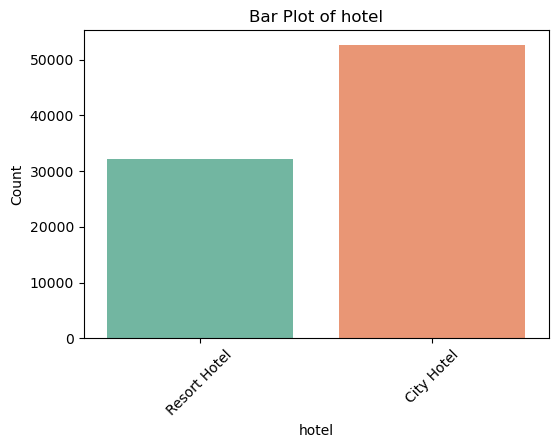

In [111]:
bar_plot('hotel')

Percentage distribution:
is_canceled
0    72.834052
1    27.165948
Name: proportion, dtype: float64
-------------------------

Count distribution:
is_canceled
0    61823
1    23059
Name: count, dtype: int64
---------------------


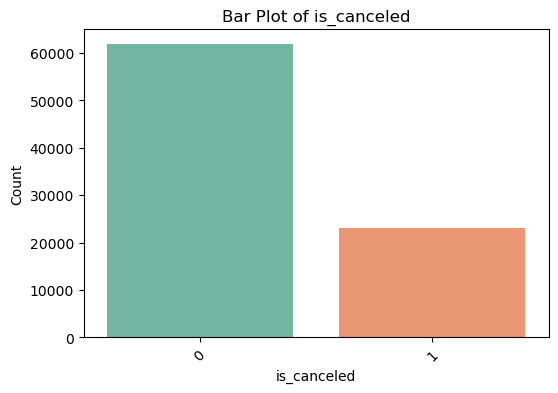

In [112]:
bar_plot('is_canceled')

Percentage distribution:
arrival_date_month
August       11.626729
July         11.180227
May           9.702882
April         9.225749
June          8.968922
March         8.818124
October       8.133644
September     7.796706
February      7.162885
December      5.985957
November      5.875215
January       5.522961
Name: proportion, dtype: float64
-------------------------

Count distribution:
arrival_date_month
August       9869
July         9490
May          8236
April        7831
June         7613
March        7485
October      6904
September    6618
February     6080
December     5081
November     4987
January      4688
Name: count, dtype: int64
---------------------


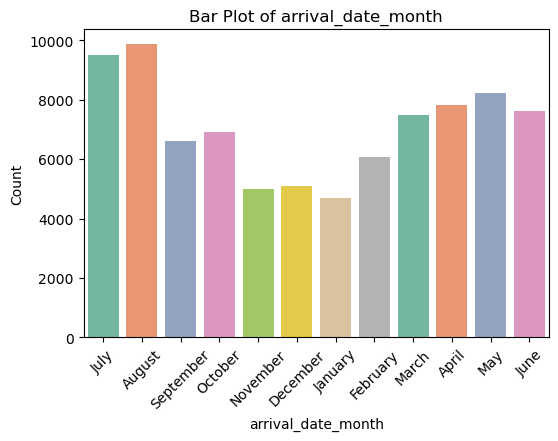

In [113]:
bar_plot('arrival_date_month')

Percentage distribution:
meal
BB           78.279258
SC           11.169624
HB            9.665182
Undefined     0.537216
FB            0.348719
Name: proportion, dtype: float64
-------------------------

Count distribution:
meal
BB           66445
SC            9481
HB            8204
Undefined      456
FB             296
Name: count, dtype: int64
---------------------


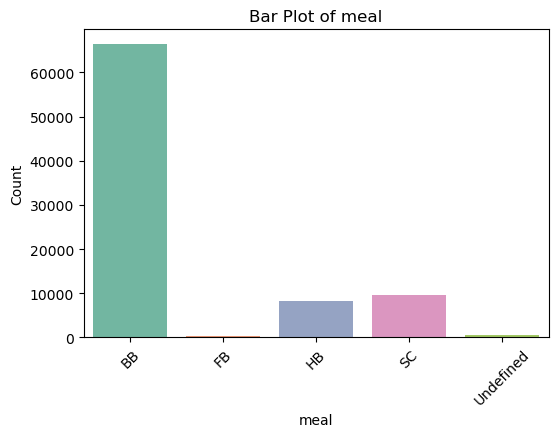

In [114]:
bar_plot('meal')

Percentage distribution:
market_segment
Online TA        58.715629
Offline TA/TO    16.299098
Direct           13.152376
Groups            5.790391
Corporate         4.945689
Complementary     0.827030
Aviation          0.267430
Undefined         0.002356
Name: proportion, dtype: float64
-------------------------

Count distribution:
market_segment
Online TA        49839
Offline TA/TO    13835
Direct           11164
Groups            4915
Corporate         4198
Complementary      702
Aviation           227
Undefined            2
Name: count, dtype: int64
---------------------


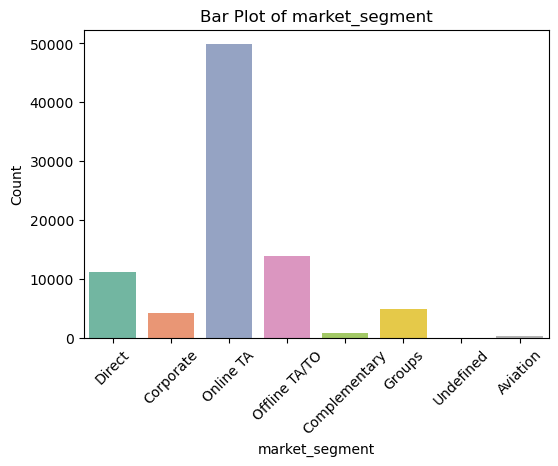

In [115]:
bar_plot('market_segment')

Percentage distribution:
distribution_channel
TA/TO        79.275936
Direct       14.536651
Corporate     5.968285
GDS           0.213237
Undefined     0.005891
Name: proportion, dtype: float64
-------------------------

Count distribution:
distribution_channel
TA/TO        67291
Direct       12339
Corporate     5066
GDS            181
Undefined        5
Name: count, dtype: int64
---------------------


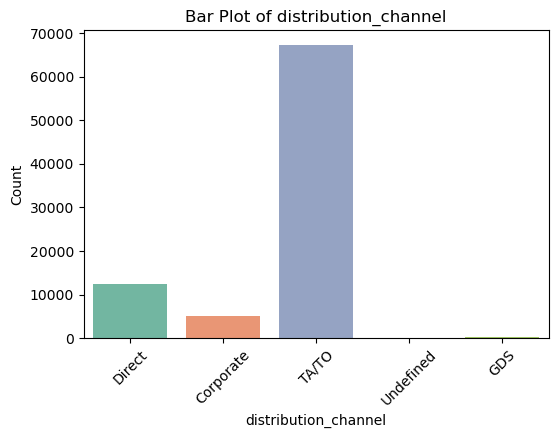

In [116]:
bar_plot('distribution_channel')

Percentage distribution:
is_repeated_guest
0    96.021536
1     3.978464
Name: proportion, dtype: float64
-------------------------

Count distribution:
is_repeated_guest
0    81505
1     3377
Name: count, dtype: int64
---------------------


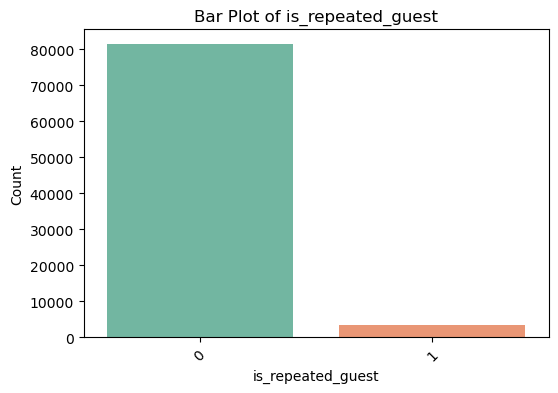

In [117]:
bar_plot('is_repeated_guest')

Percentage distribution:
reserved_room_type
A    66.231946
D    20.027803
E     6.691643
F     2.765015
G     1.734172
B     1.166325
C     0.872977
H     0.495983
L     0.007069
P     0.007069
Name: proportion, dtype: float64
-------------------------

Count distribution:
reserved_room_type
A    56219
D    17000
E     5680
F     2347
G     1472
B      990
C      741
H      421
L        6
P        6
Name: count, dtype: int64
---------------------


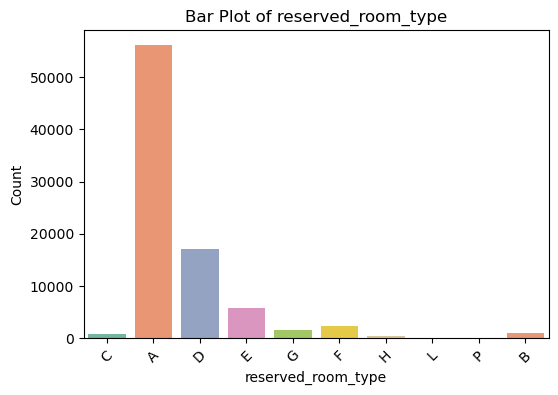

In [118]:
bar_plot('reserved_room_type')

Percentage distribution:
assigned_room_type
A    54.222332
D    25.965458
E     8.055889
F     3.708678
C     2.329116
G     2.231333
B     2.126481
H     0.622040
I     0.407625
K     0.322801
P     0.007069
L     0.001178
Name: proportion, dtype: float64
-------------------------

Count distribution:
assigned_room_type
A    46025
D    22040
E     6838
F     3148
C     1977
G     1894
B     1805
H      528
I      346
K      274
P        6
L        1
Name: count, dtype: int64
---------------------


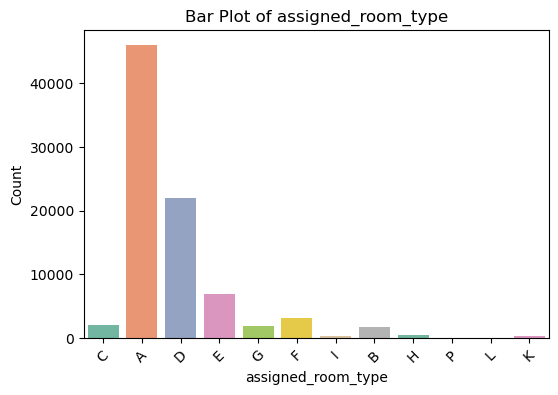

In [119]:
bar_plot('assigned_room_type')

Percentage distribution:
room_match
1    84.727033
0    15.272967
Name: proportion, dtype: float64
-------------------------

Count distribution:
room_match
1    71918
0    12964
Name: count, dtype: int64
---------------------


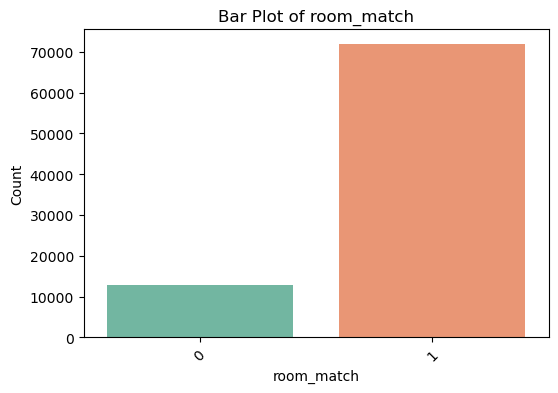

In [120]:
bar_plot('room_match')

Percentage distribution:
deposit_type
No Deposit    98.659315
Non Refund     1.216984
Refundable     0.123701
Name: proportion, dtype: float64
-------------------------

Count distribution:
deposit_type
No Deposit    83744
Non Refund     1033
Refundable      105
Name: count, dtype: int64
---------------------


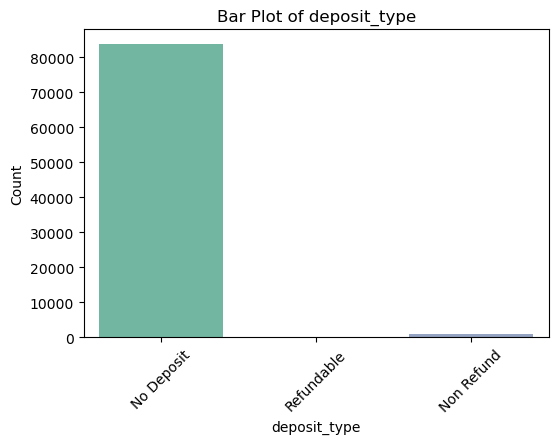

In [121]:
bar_plot('deposit_type')

Percentage distribution:
customer_type
Transient          82.038595
Transient-Party    13.636578
Contract            3.695719
Group               0.629109
Name: proportion, dtype: float64
-------------------------

Count distribution:
customer_type
Transient          69636
Transient-Party    11575
Contract            3137
Group                534
Name: count, dtype: int64
---------------------


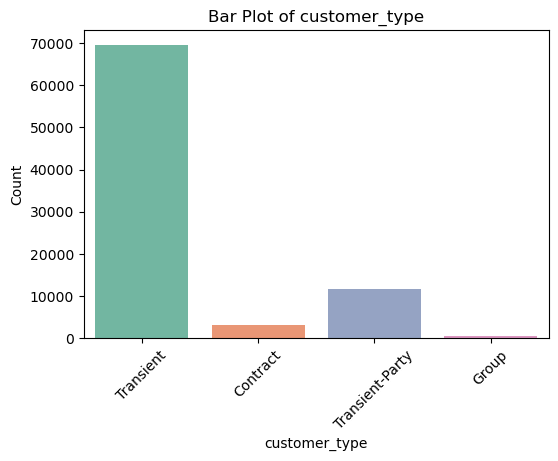

In [122]:
bar_plot('customer_type')

Percentage distribution:
total_of_special_requests
0    50.419406
1    33.197851
2    13.411560
3     2.588299
4     0.344007
5     0.038878
Name: proportion, dtype: float64
-------------------------

Count distribution:
total_of_special_requests
0    42797
1    28179
2    11384
3     2197
4      292
5       33
Name: count, dtype: int64
---------------------


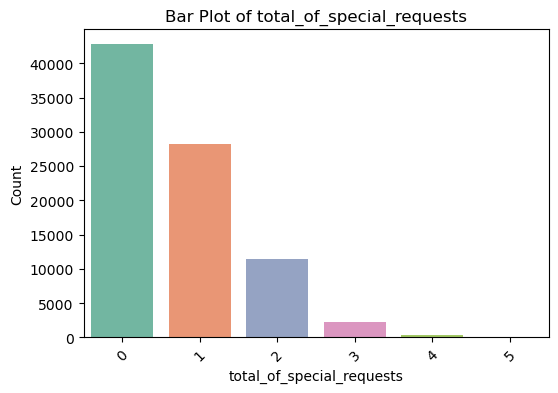

In [123]:
bar_plot('total_of_special_requests')

Percentage distribution:
reservation_status
Check-Out    72.834052
Canceled     25.991376
No-Show       1.174572
Name: proportion, dtype: float64
-------------------------

Count distribution:
reservation_status
Check-Out    61823
Canceled     22062
No-Show        997
Name: count, dtype: int64
---------------------


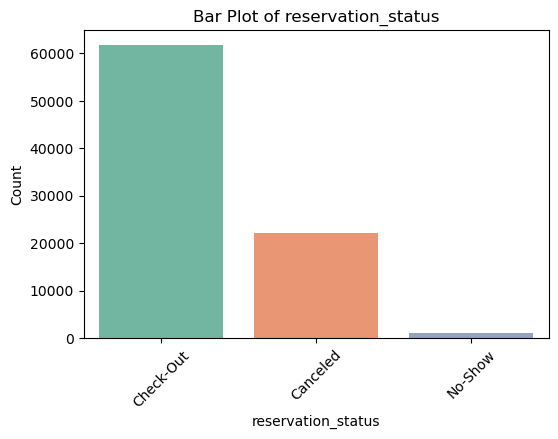

In [124]:
bar_plot('reservation_status')

Percentage distribution:
via_agent
1    85.89218
0    14.10782
Name: proportion, dtype: float64
-------------------------

Count distribution:
via_agent
1    72907
0    11975
Name: count, dtype: int64
---------------------


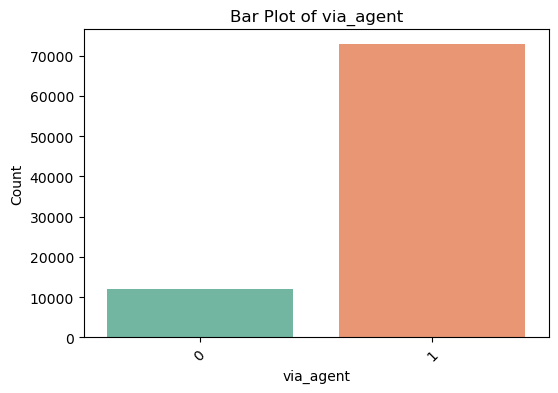

In [125]:
bar_plot('via_agent')

Percentage distribution:
arrival_day_name
Monday       16.173040
Friday       15.251761
Saturday     14.939563
Thursday     14.868877
Sunday       13.192432
Wednesday    12.942673
Tuesday      12.631653
Name: proportion, dtype: float64
-------------------------

Count distribution:
arrival_day_name
Monday       13728
Friday       12946
Saturday     12681
Thursday     12621
Sunday       11198
Wednesday    10986
Tuesday      10722
Name: count, dtype: int64
---------------------


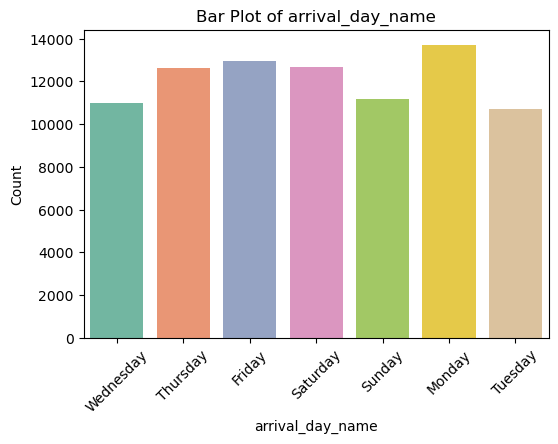

In [126]:
bar_plot('arrival_day_name')

Percentage distribution:
cancled_or_not
0    98.025494
1     1.974506
Name: proportion, dtype: float64
-------------------------

Count distribution:
cancled_or_not
0    83206
1     1676
Name: count, dtype: int64
---------------------


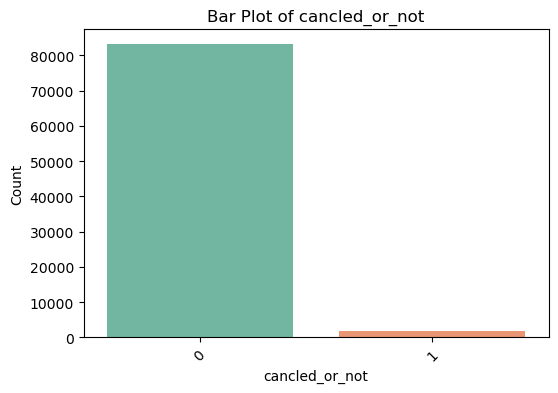

In [127]:
bar_plot('cancled_or_not')

Percentage distribution:
days_waited_or_not
0    98.992719
1     1.007281
Name: proportion, dtype: float64
-------------------------

Count distribution:
days_waited_or_not
0    84027
1      855
Name: count, dtype: int64
---------------------


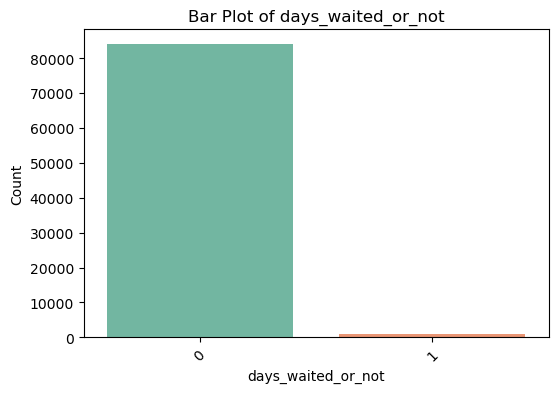

In [128]:
bar_plot('days_waited_or_not')

Percentage distribution:
booking_changed_or_not
0    81.991471
1    18.008529
Name: proportion, dtype: float64
-------------------------

Count distribution:
booking_changed_or_not
0    69596
1    15286
Name: count, dtype: int64
---------------------


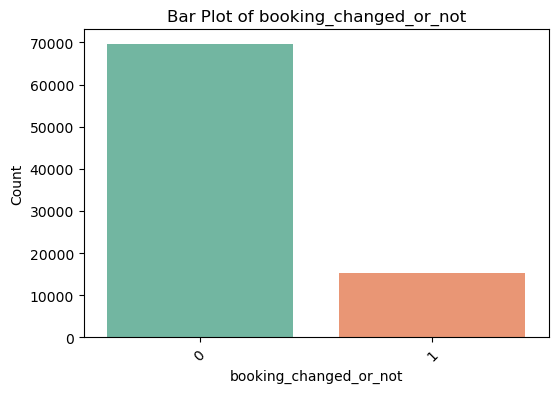

In [129]:
bar_plot('booking_changed_or_not')

Percentage distribution:
park_req_or_not
0    91.85104
1     8.14896
Name: proportion, dtype: float64
-------------------------

Count distribution:
park_req_or_not
0    77965
1     6917
Name: count, dtype: int64
---------------------


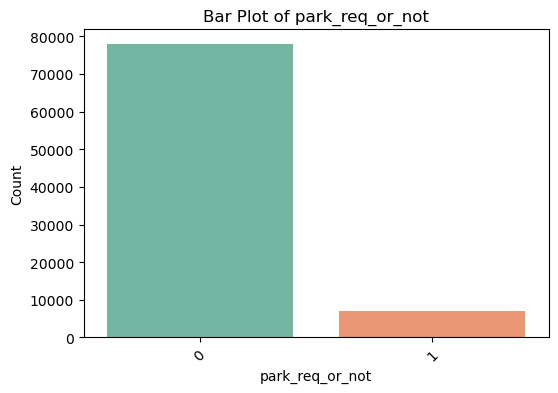

In [130]:
bar_plot('park_req_or_not')

In [131]:
top_10_countries = df['country_name'].value_counts().head(10).reset_index()
top_10_countries.columns = ['country_name', 'count']
print(top_10_countries)

     country_name  count
0        Portugal  27012
1  United Kingdom  10252
2          France   8642
3           Spain   6790
4         Germany   5334
5           Italy   2994
6         Ireland   2981
7         Belgium   2048
8          Brazil   1956
9     Netherlands   1880


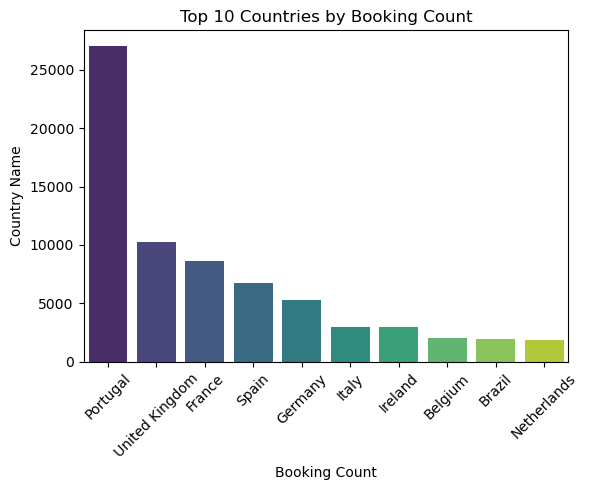

In [132]:
plt.figure(figsize=(6, 5))
sns.barplot(data=top_10_countries, x='country_name', y='count', palette='viridis')

plt.title('Top 10 Countries by Booking Count')
plt.xticks(rotation=45)

plt.xlabel('Booking Count')
plt.ylabel('Country Name')
plt.tight_layout()
plt.show()

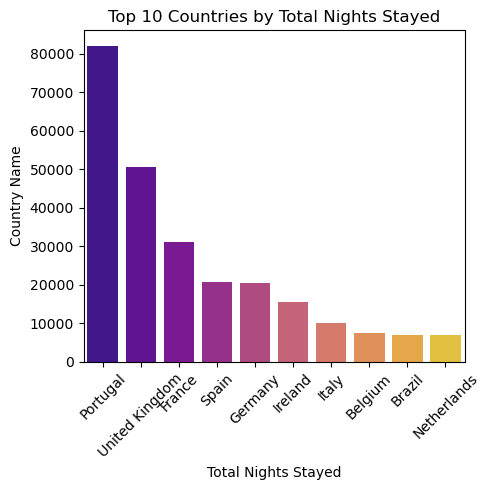

In [133]:
country_night_stays = df.groupby('country_name')['total_nights_stayed'].sum().reset_index()

# Step 2: Sort and get top 10 countries
top_10_night_stays_df = country_night_stays.sort_values(by='total_nights_stayed', ascending=False).head(10)

# Step 3: Plot the horizontal bar chart
plt.figure(figsize=(5, 5))
sns.barplot(data=top_10_night_stays_df, x='country_name', y='total_nights_stayed', palette='plasma')
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Total Nights Stayed')
plt.xlabel('Total Nights Stayed')
plt.ylabel('Country Name')
plt.tight_layout()
plt.show()

## Bivariate Analysis

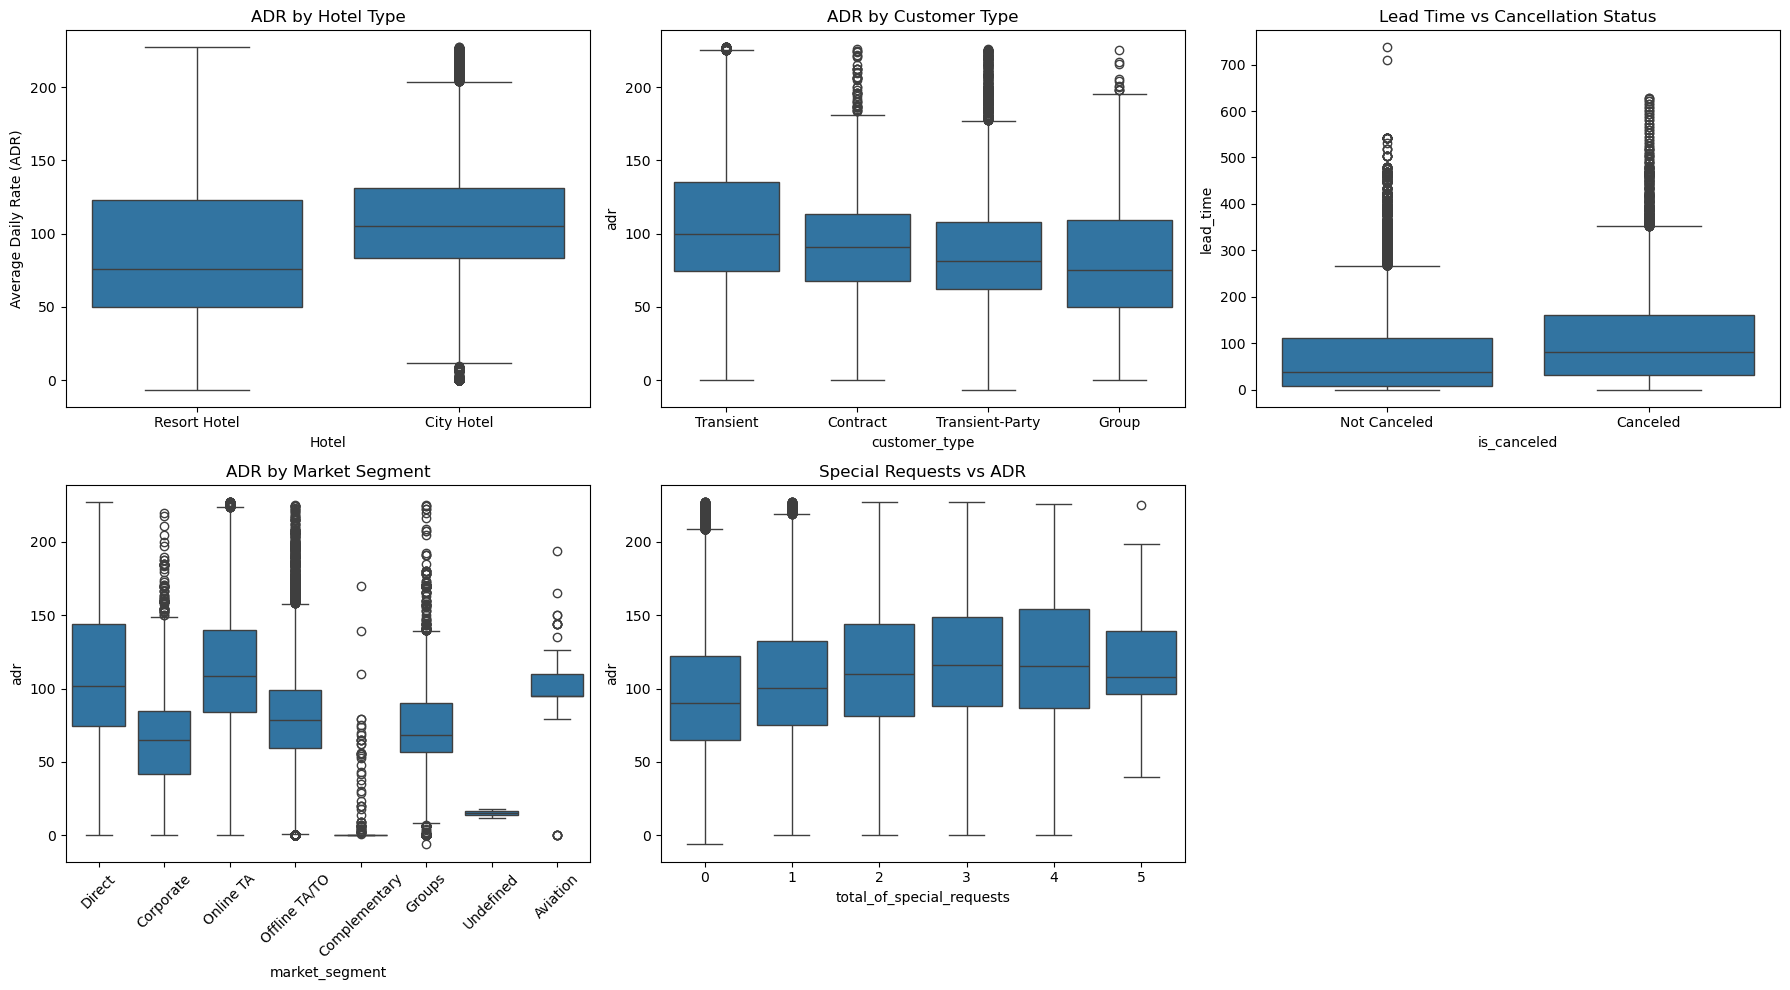

In [134]:
## BOXPLOTS

plt.figure(figsize = (18,10))

## 1. ADR by Hotel Type

plt.subplot(2,3,1)
sns.boxplot(x = df['hotel'], y = df['adr'])
plt.title('ADR by Hotel Type')
plt.xlabel('Hotel')
plt.ylabel('Average Daily Rate (ADR)')

## 2. ADR by Customer Type

plt.subplot(2,3,2)
sns.boxplot(x = df['customer_type'], y = df['adr'])
plt.title('ADR by Customer Type')

## 3. Lead Time vs Cancellation Status

plt.subplot(2,3,3)
sns.boxplot(x = df['is_canceled'], y = df['lead_time'])
plt.title('Lead Time vs Cancellation Status')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])

## 4. ADR by Market Segment

plt.subplot(2,3,4)
sns.boxplot(data=df, x='market_segment', y='adr')
plt.title('ADR by Market Segment')
plt.xticks(rotation=45)

## 5. ADR vs Special Requests

plt.subplot(2,3,5)
sns.boxplot(data=df, x='total_of_special_requests', y='adr')
plt.title('Special Requests vs ADR')


plt.tight_layout()
plt.show()

## Time series analysis

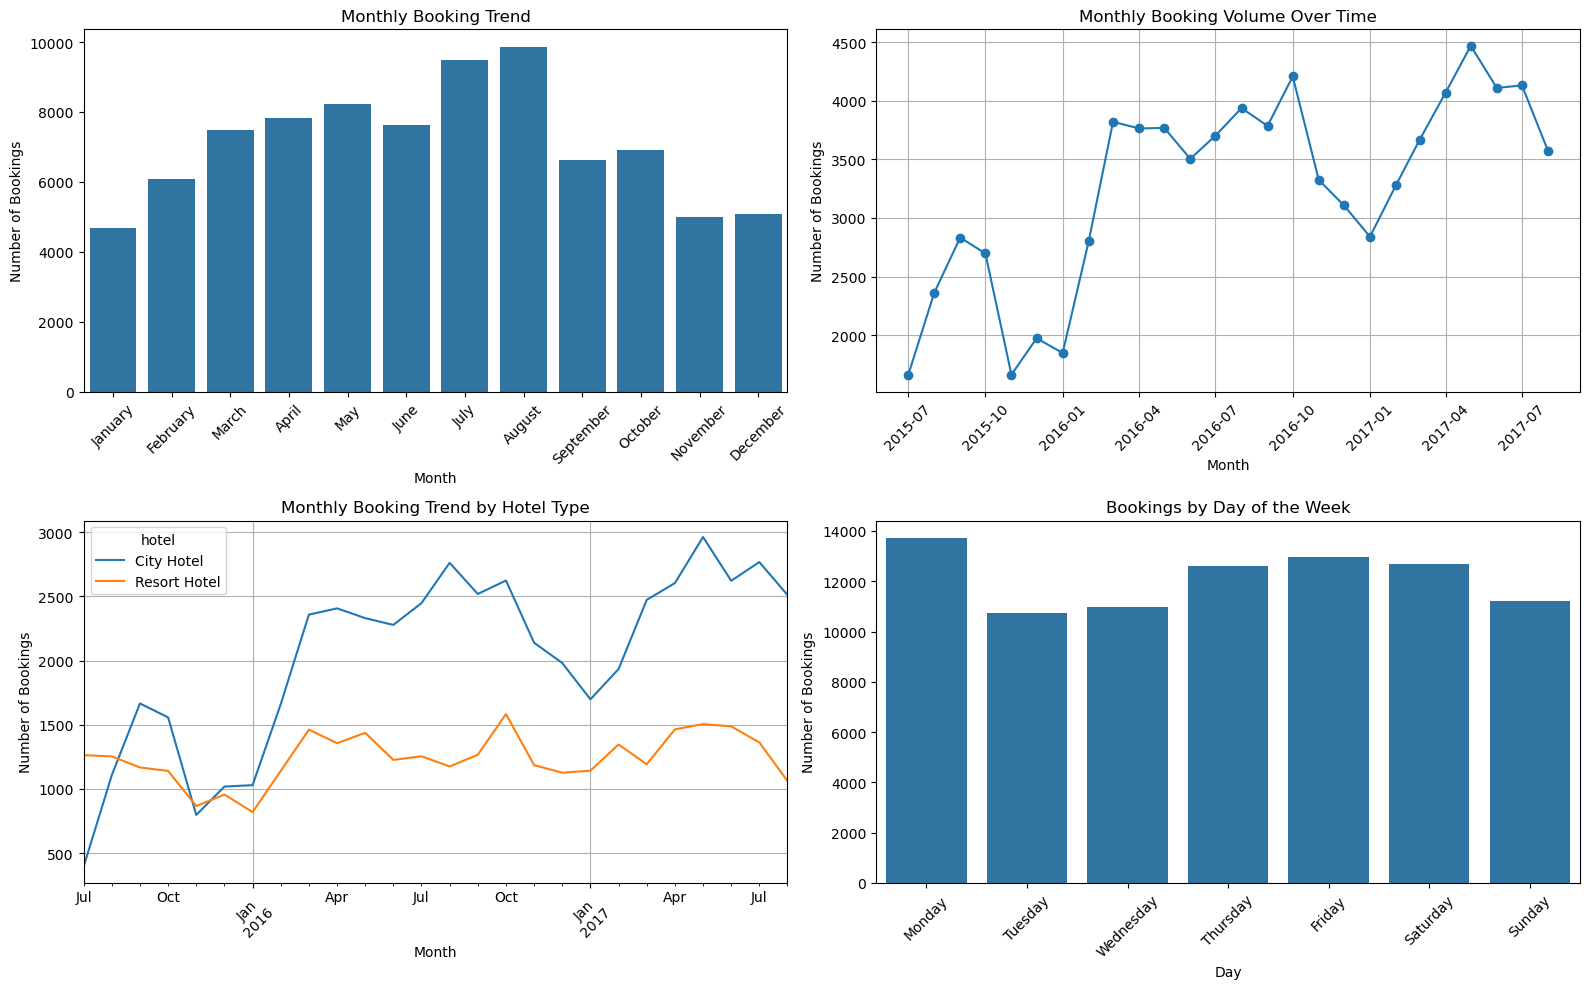

In [135]:
plt.figure(figsize=(16,10))  # Increase figure size for 2x2 layout

## 1. Monthly Booking Trend
df['arrival_month'] = df['arrival_date'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.subplot(2,2,1)
sns.countplot(data=df, x='arrival_month', order=month_order)
plt.title('Monthly Booking Trend')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)

## 2. Monthly Booking Volume (Time Series)
monthly_bookings = df.groupby(df['arrival_date'].dt.to_period('M')).size()
monthly_bookings.index = monthly_bookings.index.to_timestamp()

plt.subplot(2,2,2)
plt.plot(monthly_bookings.index, monthly_bookings.values, marker='o', linestyle='-')
plt.title('Monthly Booking Volume Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(True)

## 3. Monthly Booking Trend by Hotel
df['month'] = df['arrival_date'].dt.to_period('M')
monthly_trend_hotel = df.groupby(['month', 'hotel']).size().unstack()
monthly_trend_hotel.index = monthly_trend_hotel.index.to_timestamp()

ax3 = plt.subplot(2,2,3)
monthly_trend_hotel.plot(ax=ax3)
plt.title('Monthly Booking Trend by Hotel Type')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.xticks(rotation=45)

## 4. Bookings by Day of the Week
df['dayofweek'] = df['arrival_date'].dt.day_name()

plt.subplot(2,2,4)
sns.countplot(data=df, x='dayofweek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Bookings by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [136]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,via_agent,arrival_date,arrival_day_name,room_match,total_people,total_nights_stayed,revenue,cancled_or_not,days_waited_or_not,booking_changed_or_not,park_req_or_not,arrival_month,month,dayofweek
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,No_Agent,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,0,2015-07-01,Wednesday,1,2,0,0.0,0,0,1,0,July,2015-07,Wednesday
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,No_Agent,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,0,2015-07-01,Wednesday,1,2,0,0.0,0,0,1,0,July,2015-07,Wednesday
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,No_Agent,0,Transient,75.0,0,0,Check-Out,2015-07-02,United Kingdom,0,2015-07-01,Wednesday,0,1,1,75.0,0,0,0,0,July,2015-07,Wednesday
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,United Kingdom,1,2015-07-01,Wednesday,1,1,1,75.0,0,0,0,0,July,2015-07,Wednesday
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,United Kingdom,1,2015-07-01,Wednesday,1,2,2,196.0,0,0,0,0,July,2015-07,Wednesday


## Bivariate Analysis

In [137]:
categorical_cols = [
    'market_segment', 'distribution_channel', 'is_repeated_guest',
    'reserved_room_type', 'assigned_room_type', 'deposit_type',
    'via_agent', 'arrival_day_name', 'cancled_or_not', 'booking_changed_or_not'
]

continuous_targets = ['adr', 'revenue']


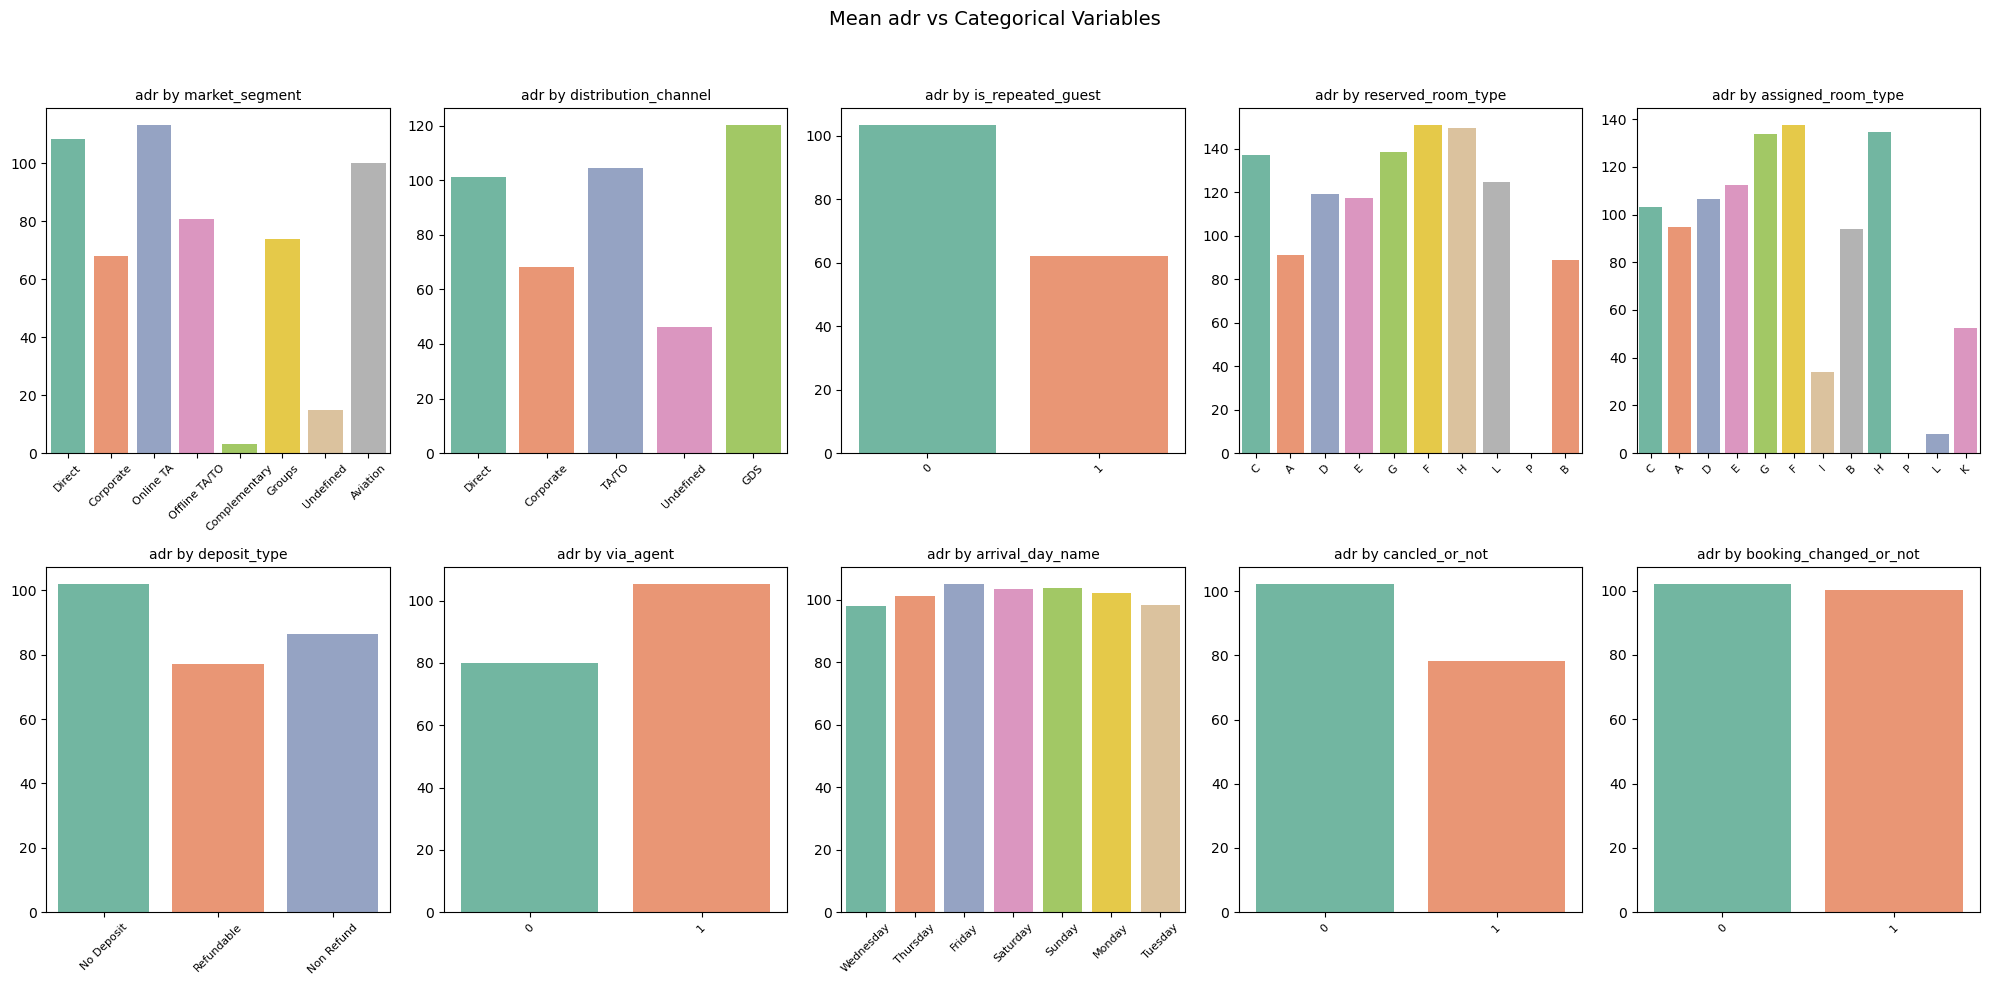

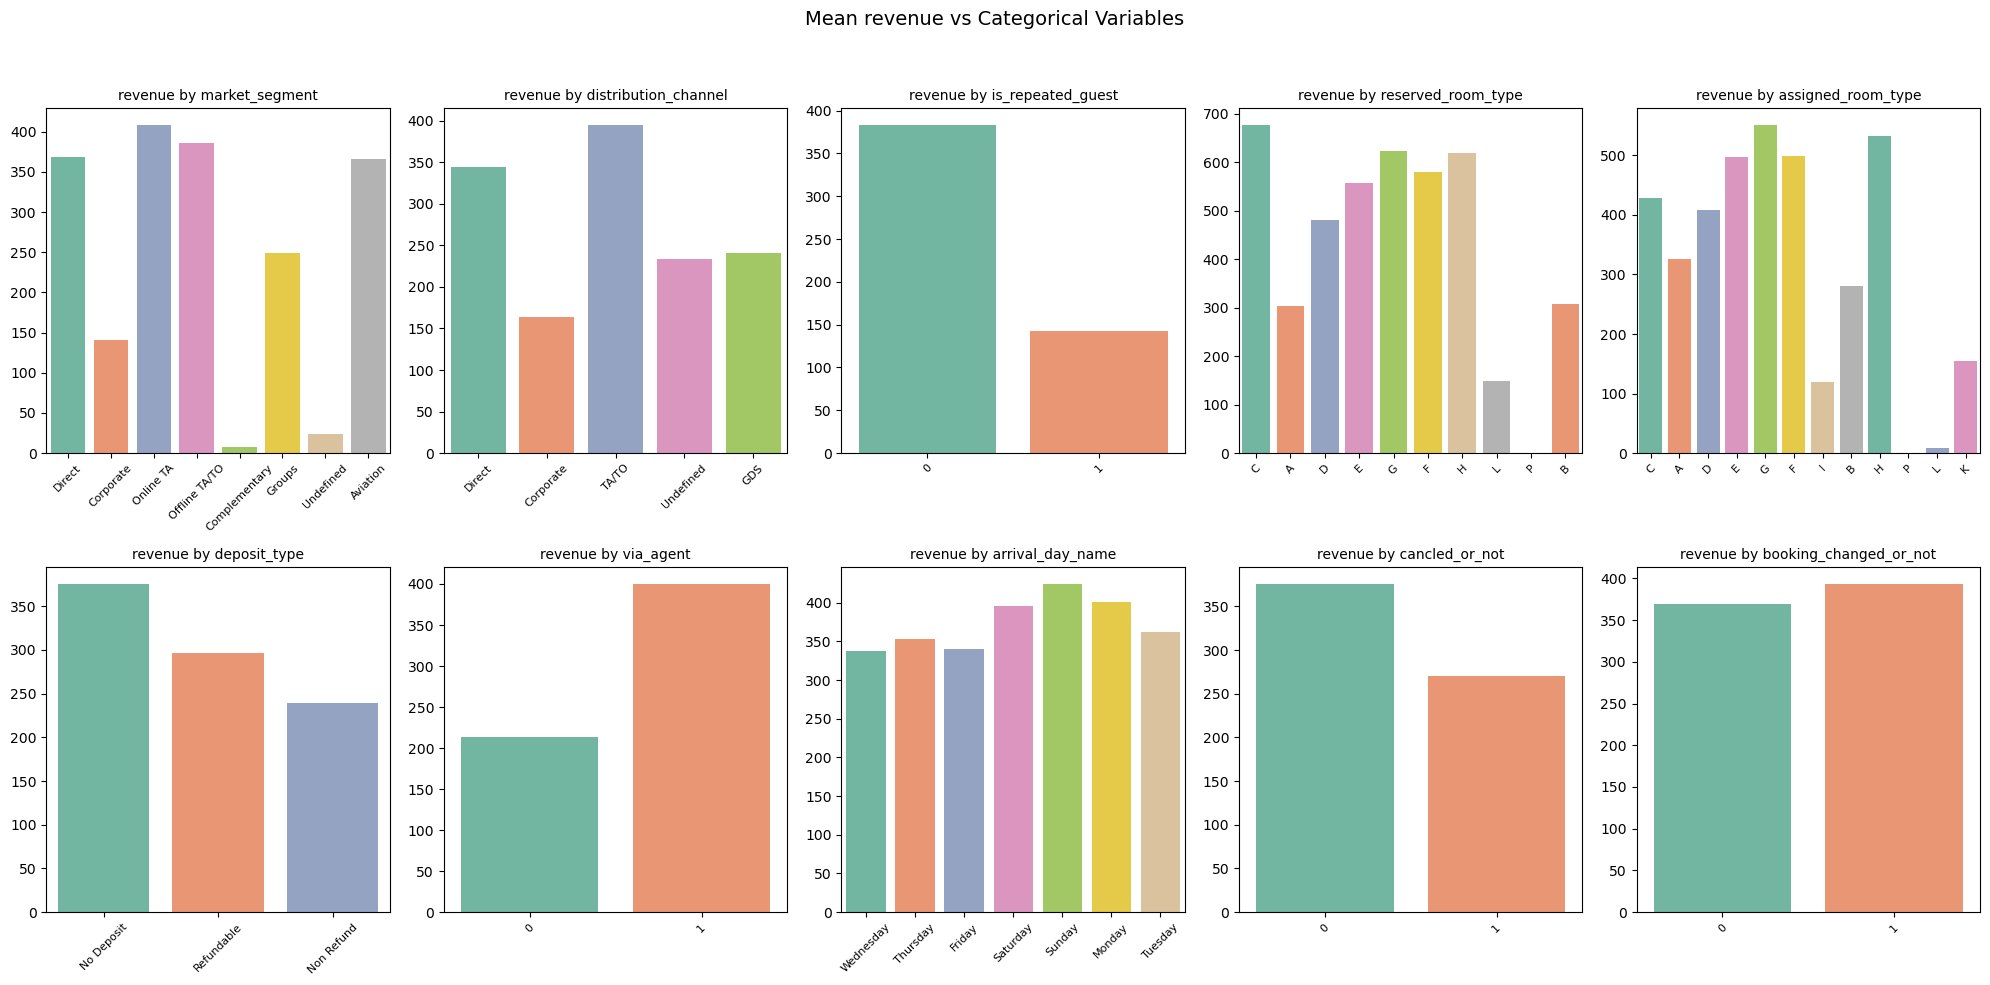

In [138]:
for target in continuous_targets:
    plt.figure(figsize=(20, 10))  # Wider figure for better visibility
    for i, cat in enumerate(categorical_cols, 1):
        plt.subplot(2, 5, i)
        sns.barplot(data=df, x=cat, y=target, estimator='mean', ci=None, palette='Set2')
        plt.title(f'{target} by {cat}', fontsize=10)
        plt.xticks(rotation=45, fontsize=8)
        plt.xlabel('')
        plt.ylabel('')
    plt.suptitle(f'Mean {target} vs Categorical Variables', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Corelation Analysis

In [139]:
numeric_cols = ['lead_time','total_of_special_requests','booking_changes','adr']
print(numeric_cols)

['lead_time', 'total_of_special_requests', 'booking_changes', 'adr']


In [140]:
correlation_matrix = df[numeric_cols].corr(method='pearson')
correlation_matrix

,lead_time,total_of_special_requests,booking_changes,adr
lead_time,1.000000,0.036110,0.077485,0.039888
total_of_special_requests,0.036110,1.000000,0.011605,0.152655
booking_changes,0.077485,0.011605,1.000000,-0.013510
adr,0.039888,0.152655,-0.013510,1.000000


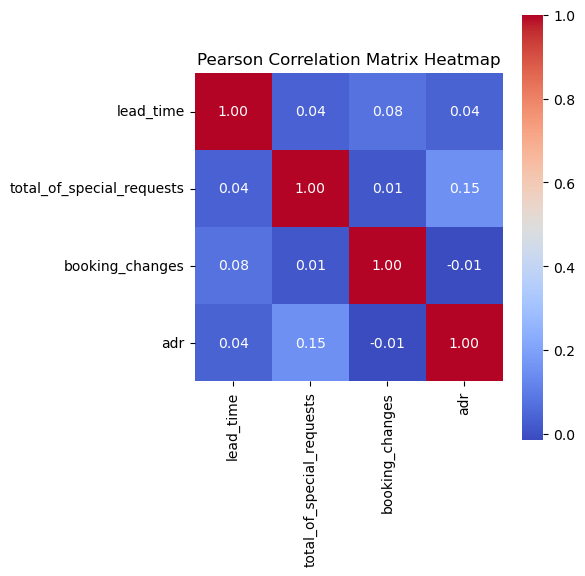

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Pearson Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


# Hypothesis Testing

In [142]:
# H0: There is no difference in ADR between bookings made through Online TA and Direct channels

In [143]:
online_ta = df[df['market_segment'] == 'Online TA']['adr']
direct = df[df['market_segment'] == 'Direct']['adr']

In [144]:
z_score, p_value = ssw.ztest(online_ta, direct, alternative = 'two-sided')  ## p-value < 0.05, so we reject H0.

if p_value < 0.05:
    print(p_value)
    print('We reject the Null Hypothesis.')
else:
    print(p_value)
    print('We do not reject the Null Hypothesis.')

1.7029606896893176e-27
We reject the Null Hypothesis.


In [145]:
## H0: Room upgrades are independent of lead time

upgraded = df[df['room_match'] == 1]['lead_time']
not_upgraded = df[df['room_match'] == 0]['lead_time']

t_score, p_value = ttest_ind(upgraded, not_upgraded, equal_var=False)  

if p_value < 0.05:
    print(p_value)
    print('We reject the Null Hypothesis.')
else:
    print(p_value)
    print('We do not reject the Null Hypothesis.')

1.8169443088558377e-236
We reject the Null Hypothesis.


In [146]:
## H0: Average stay duration does not differ between customer types
## i.e. avg(stay_duration of Transient) == avg(stay_duration of Contract) == avg(stay_duration of Transient-Party) == avg(stay_duration of Group) 

df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Transient
df_T = df[df['customer_type'] == 'Transient'][['stay_duration']].copy()
df_T['customer_type'] = 'Transient'

# Contract
df_C = df[df['customer_type'] == 'Contract'][['stay_duration']].copy()
df_C['customer_type'] = 'Contract'

# Transient-Party
df_TP = df[df['customer_type'] == 'Transient-Party'][['stay_duration']].copy()
df_TP['customer_type'] = 'Transient-Party'

# Group
df_G = df[df['customer_type'] == 'Group'][['stay_duration']].copy()
df_G['customer_type'] = 'Group'

df_total = pd.concat([df_T, df_C,df_TP, df_G])

## One Way ANOVA Test

mod1 = ols('stay_duration ~ customer_type',data=df_total).fit()
tbl = sm.stats.anova_lm(mod1)
print(tbl)

                    df         sum_sq      mean_sq           F  PR(>F)
customer_type      3.0   19758.803192  6586.267731  886.523856     0.0
Residual       84878.0  630585.661736     7.429318         NaN     NaN


In [147]:
print(pairwise_tukeyhsd(endog=df_total['stay_duration'],groups=df_total['customer_type']))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1       group2     meandiff p-adj  lower   upper  reject
---------------------------------------------------------------
 Contract           Group  -3.0938   0.0 -3.4216 -2.7659   True
 Contract       Transient  -2.4786   0.0 -2.6064 -2.3508   True
 Contract Transient-Party  -2.6997   0.0 -2.8407 -2.5588   True
    Group       Transient   0.6151   0.0  0.3109  0.9193   True
    Group Transient-Party    0.394 0.006  0.0841   0.704   True
Transient Transient-Party  -0.2211   0.0 -0.2914 -0.1508   True
---------------------------------------------------------------


In [148]:
## p-value < 0.05, so we reject the Null Hypothesis.

# Key buisness question

## 1	What influences ADR the most?

In [149]:
numeric_df = df.select_dtypes(include=np.number)

In [150]:
corr_matrix = numeric_df.corr(method='pearson')

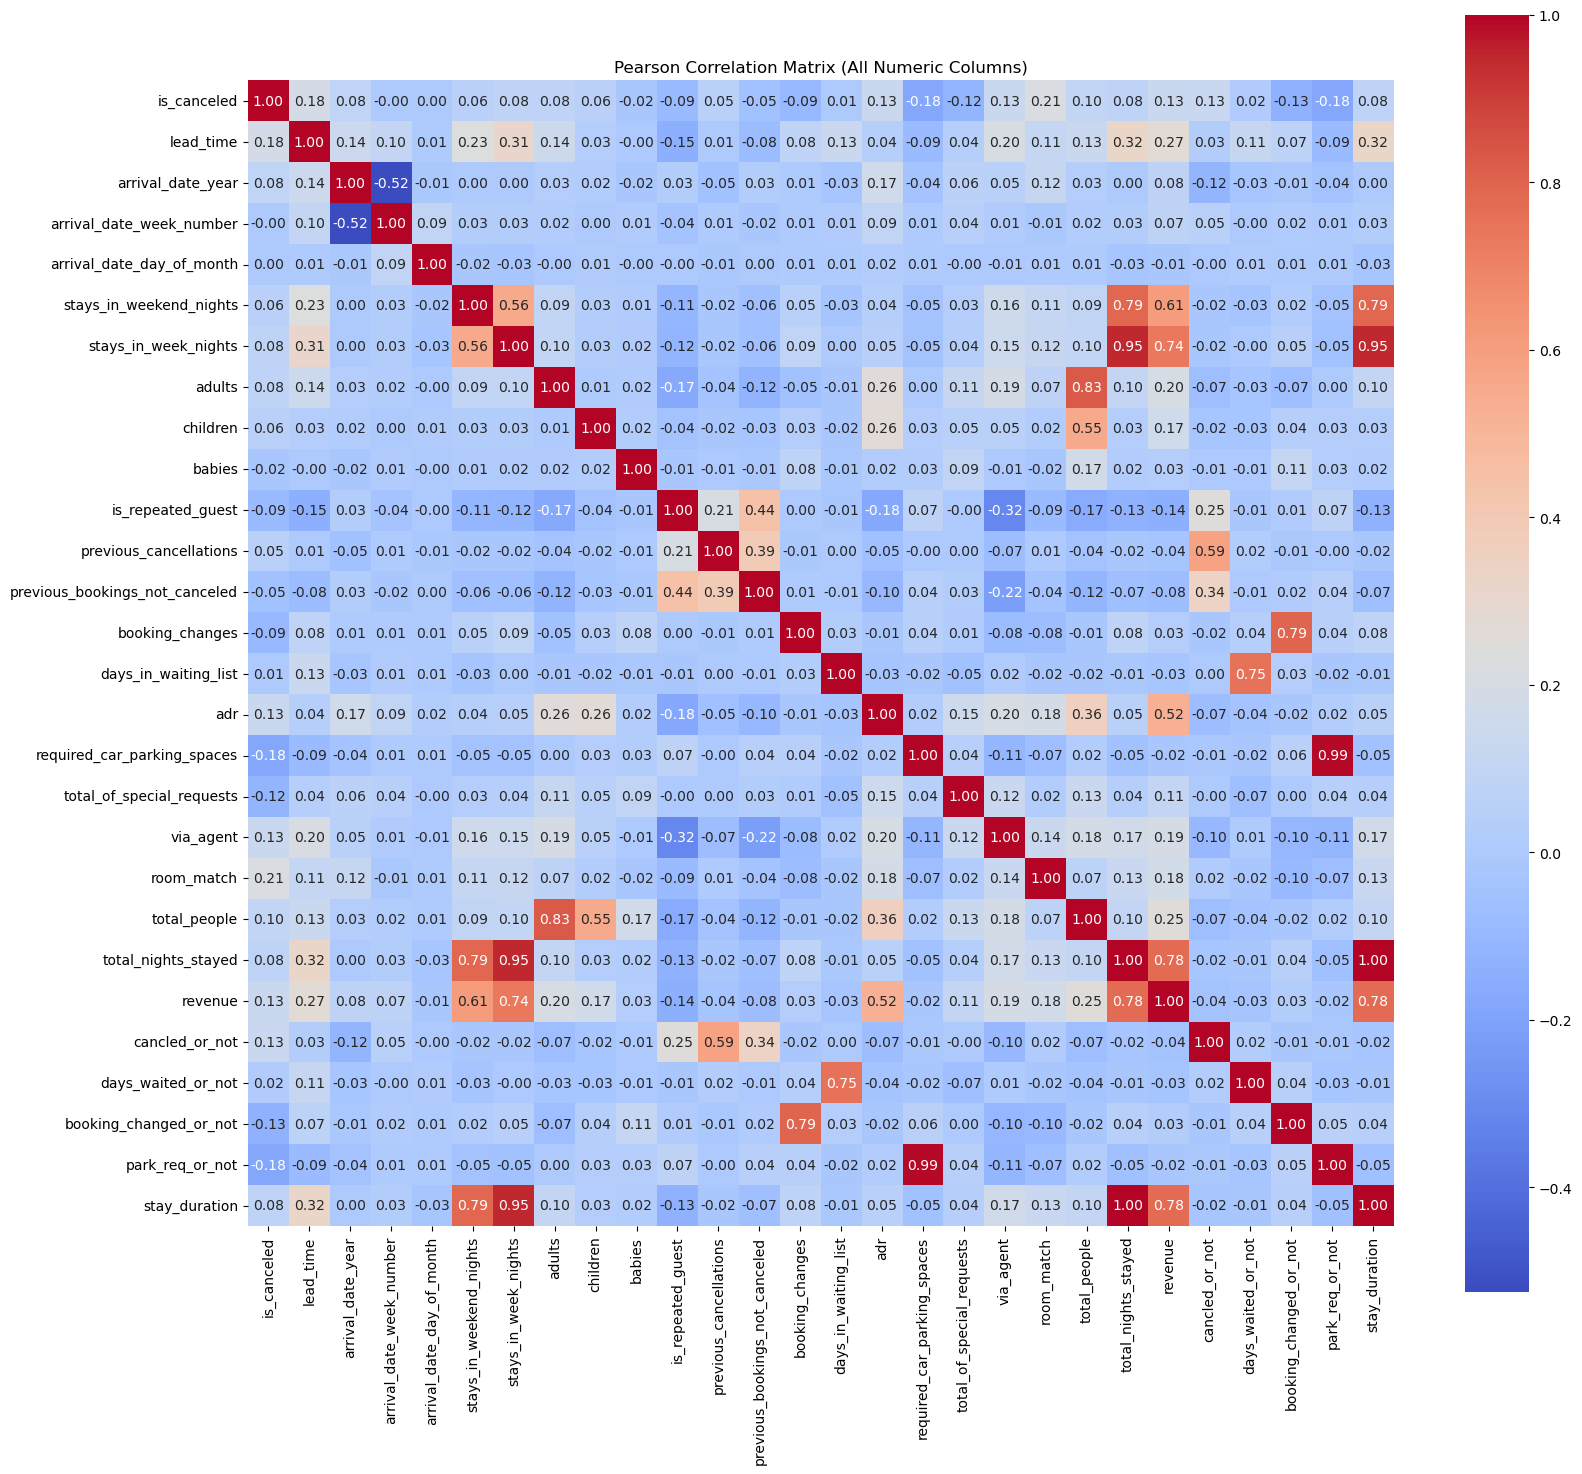

In [151]:
plt.figure(figsize=(17, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Pearson Correlation Matrix (All Numeric Columns)")
plt.tight_layout()
plt.show()

In [152]:
print('ANS = total no of peoples affect ade the most')

ANS = total no of peoples affect ade the most


## 2	Do guests who book earlier tend to request more changes?

In [153]:
## H0 : There is no correlation between lead_time and booking changes.

t_stat, p_value = pearsonr(df['lead_time'], df['booking_changes'])

if p_value < 0.05:
    print('Reject Null Hypothesis.')
else:
    print('Do not reject Null Hypothesis.')

Reject Null Hypothesis.


In [154]:
print('There is no correlation between lead_time and booking changes.')

There is no correlation between lead_time and booking changes.


## 3	Are there pricing or booking differences across countries?

In [155]:
top_countries = df['country'].value_counts().head(5).index
df_top = df[df['country'].isin(top_countries)]

In [156]:
## One Way ANOVA Test.

mod1 = ols('adr ~ country', data = df_top).fit()
anova_table = sm.stats.anova_lm(mod1)
print(anova_table)

               df        sum_sq       mean_sq           F  PR(>F)
country       4.0  4.724083e+06  1.181021e+06  570.972022     0.0
Residual  58025.0  1.200212e+08  2.068439e+03         NaN     NaN


In [157]:
print(pairwise_tukeyhsd(endog=df_top['adr'],groups=df_top['country']))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
   DEU    ESP    8.153   0.0   5.8831  10.4229   True
   DEU    FRA   4.7656   0.0   2.6054   6.9259   True
   DEU    GBR  -9.6334   0.0 -11.7279  -7.5389   True
   DEU    PRT -14.7838   0.0 -16.6427  -12.925   True
   ESP    FRA  -3.3874   0.0  -5.3993  -1.3755   True
   ESP    GBR -17.7864   0.0 -19.7276 -15.8453   True
   ESP    PRT -22.9368   0.0 -24.6211 -21.2526   True
   FRA    GBR -14.3991   0.0 -16.2108 -12.5873   True
   FRA    PRT -19.5495   0.0 -21.0827 -18.0162   True
   GBR    PRT  -5.1504   0.0  -6.5895  -3.7113   True
-----------------------------------------------------


In [158]:
print("p-value < 0.05, we reject the Null Hypothesis.")
print('there is no pricing or booking diffrence across countries')

p-value < 0.05, we reject the Null Hypothesis.
there is no pricing or booking diffrence across countries


## 4	Is there a pattern in room upgrades or reassignment?

In [159]:
## H0 : Lead Time has no effect on room reassignment.

upgraded = df[df['room_match'] == 1]['lead_time']
not_upgraded = df[df['room_match'] == 0]['lead_time']

t_stat, p_val = ttest_ind(upgraded, not_upgraded, equal_var=False)
p_val

1.8169443088558377e-236

In [160]:
print("Lead Time has no effect on room reassignment")

Lead Time has no effect on room reassignment


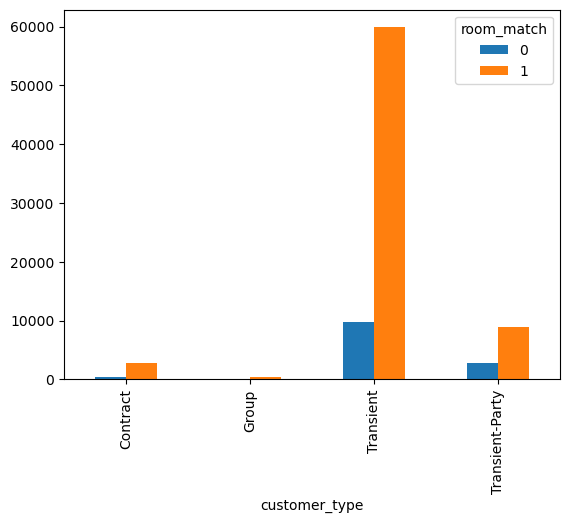

In [161]:
room_cust_ct = pd.crosstab(df['customer_type'], df['room_match'])
room_cust_ct.plot(kind='bar')
plt.show()

In [162]:
## H0 : Customer Type does not affect room reassignment.

chi2, p_value, dof, ex = chi2_contingency(room_cust_ct)
p_value

2.796817683283767e-151

In [163]:
print('Reject Null Hypothesis.')

Reject Null Hypothesis.


## 5	Are reserved room types consistently matched with assigned room types?

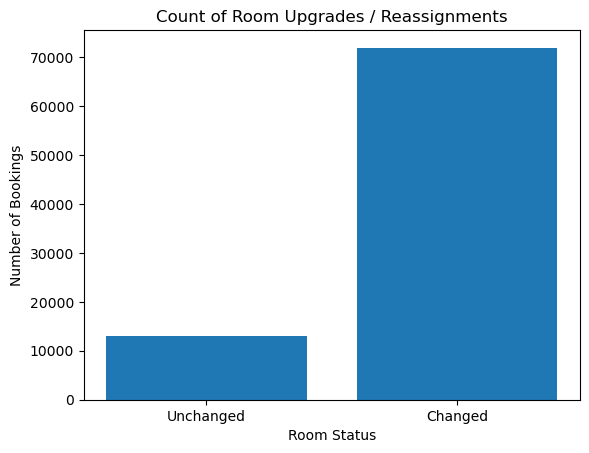

In [164]:
plt.bar(df['room_match'].value_counts().index, df['room_match'].value_counts())
plt.xticks([0,1], ['Unchanged', 'Changed'])
plt.xlabel('Room Status')
plt.ylabel('Number of Bookings')
plt.title('Count of Room Upgrades / Reassignments')
plt.show()

In [165]:
match_rate = df['room_match'].value_counts(normalize=True) * 100
print('Percent of Bookings where Reserved Room and Assigned Room were the same: ',match_rate.iloc[0])
print('Percent of Bookings where Rooms were changed: ',match_rate.iloc[1])

Percent of Bookings where Reserved Room and Assigned Room were the same:  84.7270328220353
Percent of Bookings where Rooms were changed:  15.272967177964706


## 6	What are the most common guest demographics (e.g., group size, nationality)?

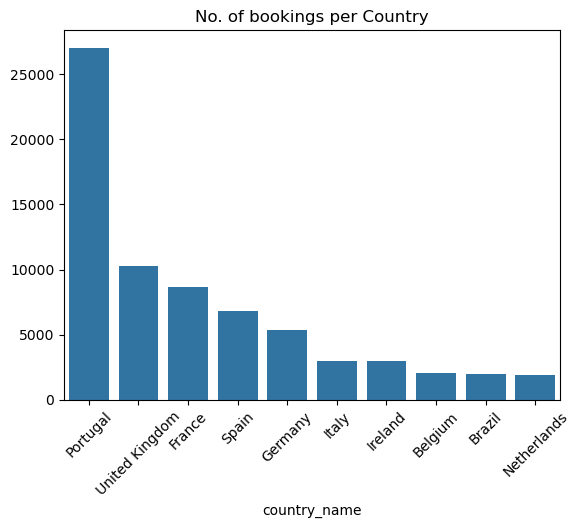

In [166]:
## Most common countries.
top_ten_countries = df['country_name'].value_counts().head(10)
plt.xticks(rotation=45)

sns.barplot(x=top_ten_countries.index, y=top_ten_countries.values)
plt.title('No. of bookings per Country')
plt.show()

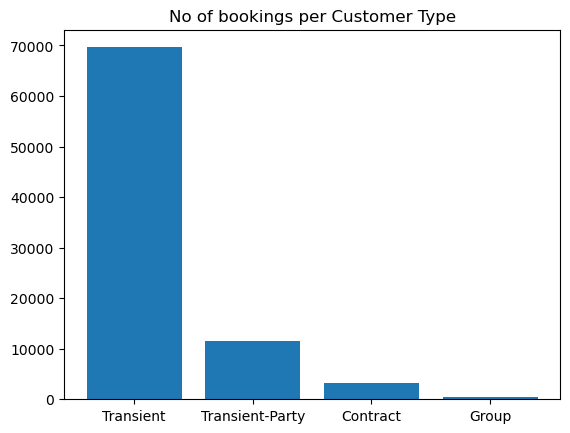

In [167]:
## Most Common Customer Type
plt.bar(df['customer_type'].value_counts().index,df['customer_type'].value_counts())
plt.title('No of bookings per Customer Type')
plt.show()

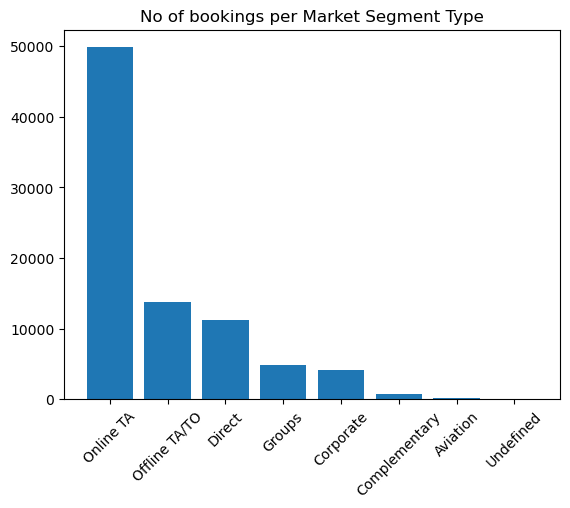

In [168]:
## Most Common Customer Type

plt.bar(df['market_segment'].value_counts().index,df['market_segment'].value_counts())
plt.title('No of bookings per Market Segment Type')
plt.xticks(rotation=45)
plt.show()

## 7 	Are there patterns in guest types (e.g., transient vs. corporate) that influence booking behavior? 

In [169]:
## Stay Duration per Customer Type
## H0: Average stay duration does not differ by customer type
mod1 = ols('stay_duration ~ customer_type', data=df).fit()
anova_table = sm.stats.anova_lm(mod1)
print(anova_table)

                    df         sum_sq      mean_sq           F  PR(>F)
customer_type      3.0   19758.803192  6586.267731  886.523856     0.0
Residual       84878.0  630585.661736     7.429318         NaN     NaN


In [170]:
print(pairwise_tukeyhsd(endog=df['stay_duration'],groups=df['customer_type']))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1       group2     meandiff p-adj  lower   upper  reject
---------------------------------------------------------------
 Contract           Group  -3.0938   0.0 -3.4216 -2.7659   True
 Contract       Transient  -2.4786   0.0 -2.6064 -2.3508   True
 Contract Transient-Party  -2.6997   0.0 -2.8407 -2.5588   True
    Group       Transient   0.6151   0.0  0.3109  0.9193   True
    Group Transient-Party    0.394 0.006  0.0841   0.704   True
Transient Transient-Party  -0.2211   0.0 -0.2914 -0.1508   True
---------------------------------------------------------------


In [171]:
## H0: Lead time does not vary across Customer Type
mod1 = ols('lead_time ~ customer_type', data=df).fit()
anova_table = sm.stats.anova_lm(mod1)
print(anova_table)

                    df        sum_sq       mean_sq           F  PR(>F)
customer_type      3.0  1.920508e+07  6.401693e+06  883.043052     0.0
Residual       84878.0  6.153300e+08  7.249582e+03         NaN     NaN


In [172]:
print(pairwise_tukeyhsd(endog=df['lead_time'],groups=df['customer_type']))

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1       group2     meandiff p-adj   lower    upper   reject
------------------------------------------------------------------
 Contract           Group -56.8173    0.0 -67.0572 -46.5773   True
 Contract       Transient  -35.781    0.0 -39.7735 -31.7885   True
 Contract Transient-Party   4.4517 0.0464   0.0486   8.8547   True
    Group       Transient  21.0363    0.0  11.5341  30.5384   True
    Group Transient-Party  61.2689    0.0  51.5871  70.9508   True
Transient Transient-Party  40.2327    0.0   38.037  42.4283   True
------------------------------------------------------------------


In [173]:
## H0: ADR is same for all customer types

mod1 = ols('adr ~ customer_type', data=df).fit()
anova_table = sm.stats.anova_lm(mod1)
print(anova_table)

                    df        sum_sq       mean_sq           F  PR(>F)
customer_type      3.0  4.325601e+06  1.441867e+06  723.638055     0.0
Residual       84878.0  1.691215e+08  1.992525e+03         NaN     NaN


In [174]:
print(pairwise_tukeyhsd(endog=df['adr'],groups=df['customer_type']))

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1       group2     meandiff p-adj   lower    upper   reject
------------------------------------------------------------------
 Contract           Group -11.7768    0.0 -17.1452  -6.4084   True
 Contract       Transient  12.4137    0.0  10.3206  14.5068   True
 Contract Transient-Party  -7.1819    0.0  -9.4902  -4.8736   True
    Group       Transient  24.1905    0.0  19.2089  29.1721   True
    Group Transient-Party   4.5949 0.0922  -0.4809   9.6707  False
Transient Transient-Party -19.5956    0.0 -20.7467 -18.4445   True
------------------------------------------------------------------


## 8 How does booking lead time vary across customer types and countries?

In [175]:
## H0: Average Lead Time is same across all customer types.

mod1 = ols('lead_time ~ customer_type', data=df).fit()
anova_table = sm.stats.anova_lm(mod1)
print(anova_table)

                    df        sum_sq       mean_sq           F  PR(>F)
customer_type      3.0  1.920508e+07  6.401693e+06  883.043052     0.0
Residual       84878.0  6.153300e+08  7.249582e+03         NaN     NaN


In [176]:
print(pairwise_tukeyhsd(endog=df['lead_time'],groups=df['customer_type']))

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1       group2     meandiff p-adj   lower    upper   reject
------------------------------------------------------------------
 Contract           Group -56.8173    0.0 -67.0572 -46.5773   True
 Contract       Transient  -35.781    0.0 -39.7735 -31.7885   True
 Contract Transient-Party   4.4517 0.0464   0.0486   8.8547   True
    Group       Transient  21.0363    0.0  11.5341  30.5384   True
    Group Transient-Party  61.2689    0.0  51.5871  70.9508   True
Transient Transient-Party  40.2327    0.0   38.037  42.4283   True
------------------------------------------------------------------


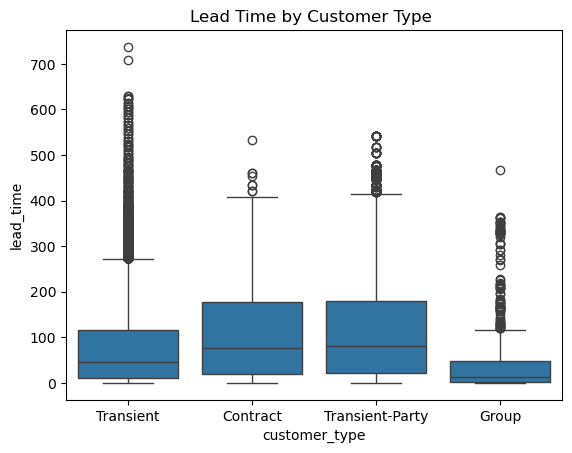

In [177]:
sns.boxplot(x=df['customer_type'],y=df['lead_time'])
plt.title('Lead Time by Customer Type ')
plt.show()

In [178]:
## H0: Average Lead Time is same across all countries.

mod1 = ols('lead_time ~ country', data=df).fit()
anova_table = sm.stats.anova_lm(mod1)
print(anova_table)

               df        sum_sq        mean_sq          F  PR(>F)
country     174.0  4.393429e+07  252495.920315  36.214262     0.0
Residual  84707.0  5.906008e+08    6972.278570        NaN     NaN


## 9.	Are longer lead times associated with fewer booking changes or cancellations?

In [179]:
## H0: Lead time and booking changes are not correlated

pearson_corr, p_value = pearsonr(df['lead_time'], df['booking_changes'])
p_value  

3.576081456380967e-113

In [180]:
## p_value < 0.05, reject Null Hypothesis.

In [181]:
## H0: Lead time has no impact on cancellation 

cancelled = df[df['is_canceled'] == 1]['lead_time']
not_cancelled = df[df['is_canceled'] == 0]['lead_time']

t_stat, p_val = ttest_ind(cancelled, not_cancelled, equal_var=False)
p_value 

3.576081456380967e-113

In [182]:
## p_value < 0.05, reject Null Hypothesis.

## 10.	What is the typical duration of stay, and how does it vary by customer type or segment?

In [183]:
## Stay Duration by Customer Type

df.groupby('customer_type')['stay_duration'].agg(['mean', 'median', 'count'])

,mean,median,count
customer_type,,,
Contract,6.035703,5.0,3137
Group,2.941948,2.0,534
Transient,3.557083,3.0,69636
Transient-Party,3.335983,3.0,11575


In [184]:
## Stay Duration by Market Segment

df.groupby('market_segment')['stay_duration'].agg(['mean', 'median', 'count'])

,mean,median,count
market_segment,,,
Aviation,3.572687,2.0,227
Complementary,1.669516,1.0,702
Corporate,2.046212,1.0,4198
Direct,3.163114,2.0,11164
Groups,3.458800,3.0,4915
Offline TA/TO,4.701265,4.0,13835
Online TA,3.589338,3.0,49839
Undefined,1.500000,1.5,2


## 11.	How often are guests upgraded or reassigned to a different room type?

In [185]:
room_change_counts = df['room_match'].value_counts()
print(room_change_counts)

room_match
1    71918
0    12964
Name: count, dtype: int64


In [186]:
room_change_pct = df['room_match'].value_counts(normalize=True) * 100
print(room_change_pct)

room_match
1    84.727033
0    15.272967
Name: proportion, dtype: float64


## 12.	Are guests who make special requests more likely to experience booking changes or longer stays?

In [187]:
with_req = df[df['total_of_special_requests'] > 0]
without_req = df[df['total_of_special_requests'] == 0]

In [188]:
t_stat, p_value1 = ttest_ind(with_req['booking_changes'], without_req['booking_changes'], equal_var=False)
print(p_value1)

0.02068984672435651


In [189]:
t_stat, p_value2 = ttest_ind(with_req['stay_duration'], without_req['stay_duration'], equal_var=False)
print(p_value2)

4.611613061437107e-19


## 13.	Do certain market segments or distribution channels show higher booking consistency or revenue?

In [190]:
# Booking consistency by market segment
booking_consistency = df.groupby('market_segment')['booking_changes'].mean().sort_values(ascending=False)

In [191]:
# Revenue by market segment
revenue_by_segment = df.groupby('market_segment')['adr'].mean().sort_values(ascending=False)

In [192]:
# Booking consistency by channel
booking_consistency_channel = df.groupby('distribution_channel')['booking_changes'].mean().sort_values(ascending=False)

In [193]:
# Revenue by channel
revenue_by_channel = df.groupby('distribution_channel')['adr'].mean().sort_values(ascending=False)

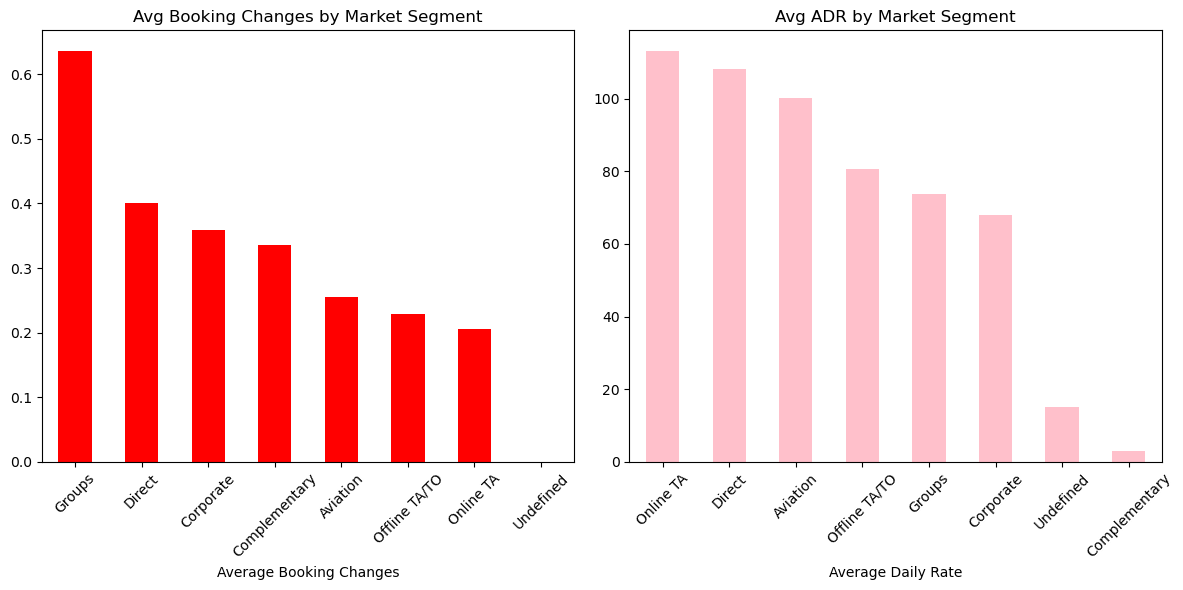

In [194]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
booking_consistency.plot(kind='bar', color='red')
plt.title("Avg Booking Changes by Market Segment")
plt.xlabel("Average Booking Changes")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
revenue_by_segment.plot(kind='bar', color='pink')
plt.title("Avg ADR by Market Segment")
plt.xlabel("Average Daily Rate")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

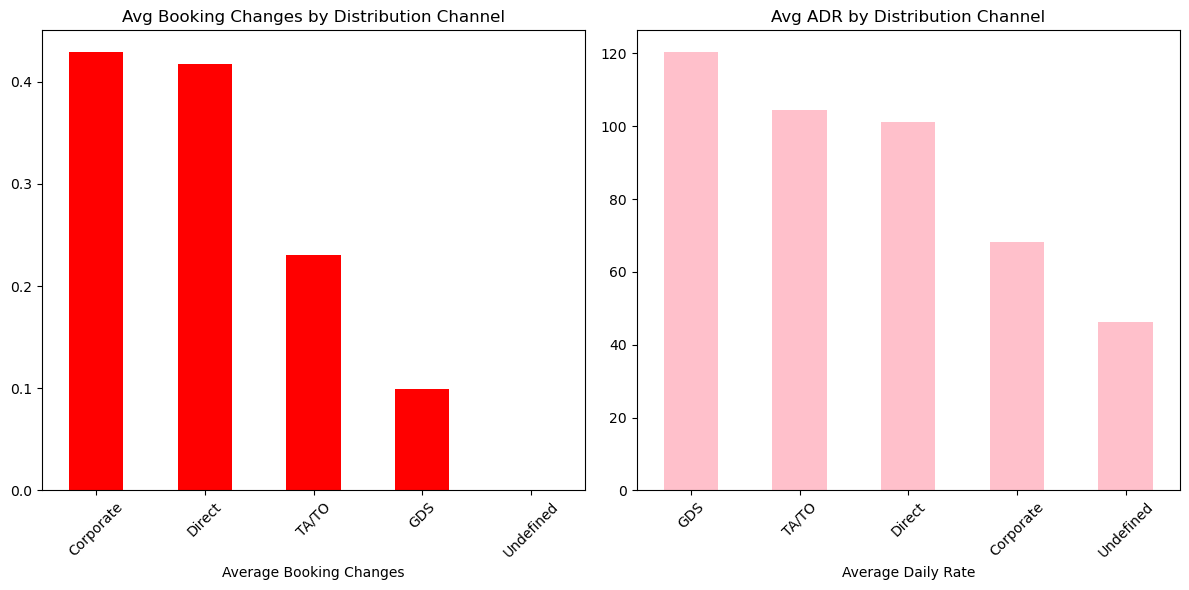

In [195]:
## Dstribution Channel

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
booking_consistency_channel.plot(kind='bar', color='red')
plt.title("Avg Booking Changes by Distribution Channel")
plt.xlabel("Average Booking Changes")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
revenue_by_channel.plot(kind='bar', color='pink')
plt.title("Avg ADR by Distribution Channel")
plt.xlabel("Average Daily Rate")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 14.	What factors are most strongly associated with higher ADR?

In [196]:
numerical_cols = ['lead_time', 'booking_changes', 'adults', 'children', 
                  'stay_duration', 'total_of_special_requests','total_people']
# Correlation with ADR
correlations = df[numerical_cols + ['adr']].corr()['adr'].sort_values(ascending=False)
print(correlations)

adr                          1.000000
total_people                 0.357018
children                     0.263990
adults                       0.258386
total_of_special_requests    0.152655
stay_duration                0.047443
lead_time                    0.039888
booking_changes             -0.013510
Name: adr, dtype: float64


## 15.	Are there customer types or segments consistently contributing to higher revenue?

In [197]:
# Revenue by customer_type
revenue_by_customer_type = df.groupby('customer_type')['revenue'].mean().sort_values(ascending=False)
revenue_by_customer_type

customer_type
Contract           522.789949
Transient          382.979672
Transient-Party    284.643153
Group              245.607228
Name: revenue, dtype: float64

In [198]:
# Revenue by market_segment
revenue_by_segment = df.groupby('market_segment')['revenue'].mean().sort_values(ascending=False)
revenue_by_segment

market_segment
Online TA        408.826273
Offline TA/TO    386.381589
Direct           368.131642
Aviation         365.785727
Groups           249.021512
Corporate        141.034559
Undefined         24.000000
Complementary      7.228661
Name: revenue, dtype: float64

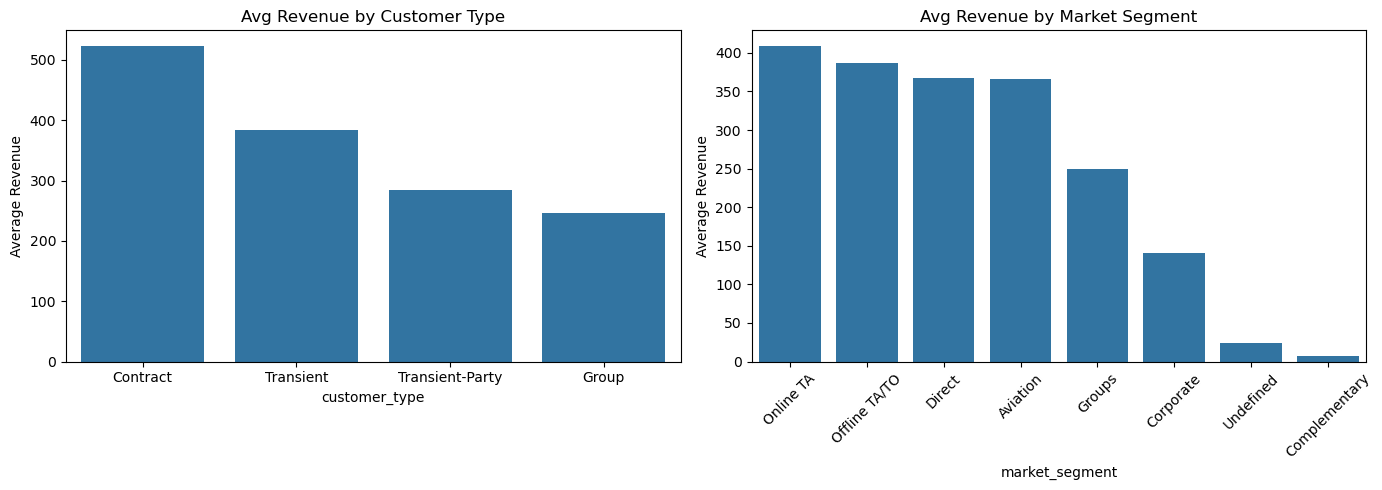

In [199]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.barplot(x=revenue_by_customer_type.index, y=revenue_by_customer_type.values)
plt.title('Avg Revenue by Customer Type')
plt.ylabel('Average Revenue')

plt.subplot(1,2,2)
sns.barplot(x=revenue_by_segment.index, y=revenue_by_segment.values)
plt.title('Avg Revenue by Market Segment')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 16.	Do bookings with more lead time or from specific countries yield higher ADR?

In [200]:
corr = df['lead_time'].corr(df['adr'])
corr

0.03988790032778016

In [201]:
top_countries = df['country_name'].value_counts().nlargest(10).index
adr_by_country = df[df['country_name'].isin(top_countries)].groupby('country_name')['adr'].mean().sort_values(ascending=False)
print(adr_by_country)

country_name
Belgium           112.857271
Italy             112.735745
Spain             112.666658
Brazil            109.923323
France            109.279273
Netherlands       106.659489
Germany           104.513635
Ireland            98.715740
United Kingdom     94.880216
Portugal           89.729815
Name: adr, dtype: float64


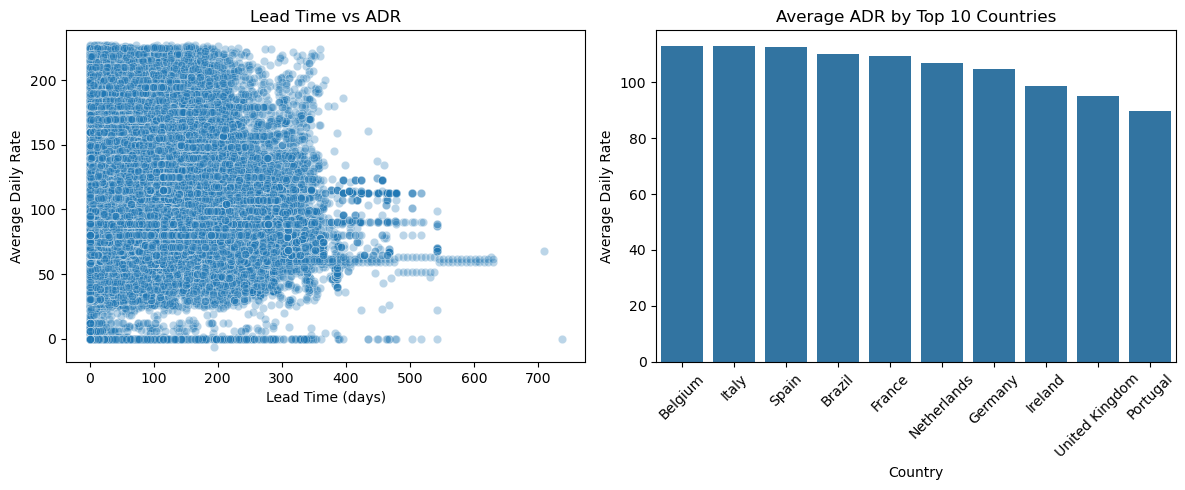

In [202]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='lead_time', y='adr', data=df, alpha=0.3)
plt.title('Lead Time vs ADR')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate')

plt.subplot(1,2,2)
sns.barplot(x=adr_by_country.index, y=adr_by_country.values)
plt.title('Average ADR by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Average Daily Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## 17.	Are guests with higher ADR more likely to request special services or make booking modifications?

In [203]:
print(df['adr'].corr(df['total_of_special_requests']))
df['adr'].corr(df['booking_changes'])

0.1526552188026867


-0.013510139794038208

## 18.	Do guests from different countries behave differently in terms of booking timing or stay length?

Percentage distribution:
booking_changed_or_not
0    81.991471
1    18.008529
Name: proportion, dtype: float64
-------------------------

Count distribution:
booking_changed_or_not
0    69596
1    15286
Name: count, dtype: int64
---------------------


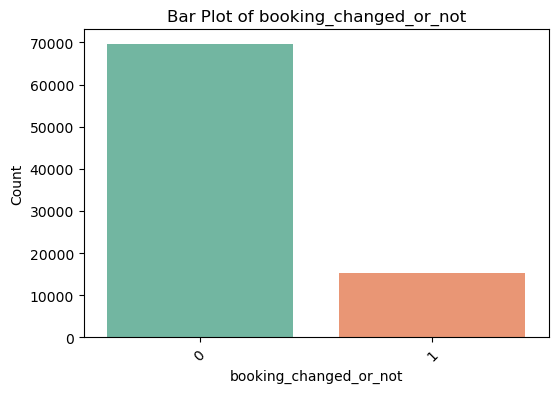

In [204]:
bar_plot('booking_changed_or_not')

In [205]:
## H0 : guests who change bookings do make more special requests.

changed = df[df['booking_changed_or_not'] == 1]['total_of_special_requests']
not_changed = df[df['booking_changed_or_not'] == 0]['total_of_special_requests']

t_stat, p_value = ttest_ind(changed, not_changed, equal_var=False)
print('p-value: ', p_value)

p-value:  0.7785372708458561


In [206]:
## H0 : booking changes are associated with cancellation behavior.

table = pd.crosstab(df['booking_changed_or_not'], df['is_canceled'])
chi2, p_chi, dof, expected = chi2_contingency(table)

print("p-value:", p_chi)

p-value: 2.1998436224906015e-294
